In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd './Experiment_data/realpilot_10162023'

/Users/weinan/Documents/GitHub/oTreeProjects/TimingGames/Experiment_data/realpilot_10162023


In [3]:
data = pd.read_csv('timing_game_2023-10-16_cus.csv')
df_copy = pd.DataFrame(data)
df_copy.columns

Index(['session', 'subperiod', 'period_length', 'xmax', 'xmin', 'ymax', 'ymin',
       'lambda', 'gamma', 'rho', 'multiplier', 'participant', 'round_number',
       'id_in_group', 'seconds', 'strategy', 'payoff', 'multiplied_payoff',
       'move', 'remaining_freeze_period', 'if_freeze_now'],
      dtype='object')

In [11]:
df_copy.shape

(18936, 21)

<IPython.core.display.Javascript object>


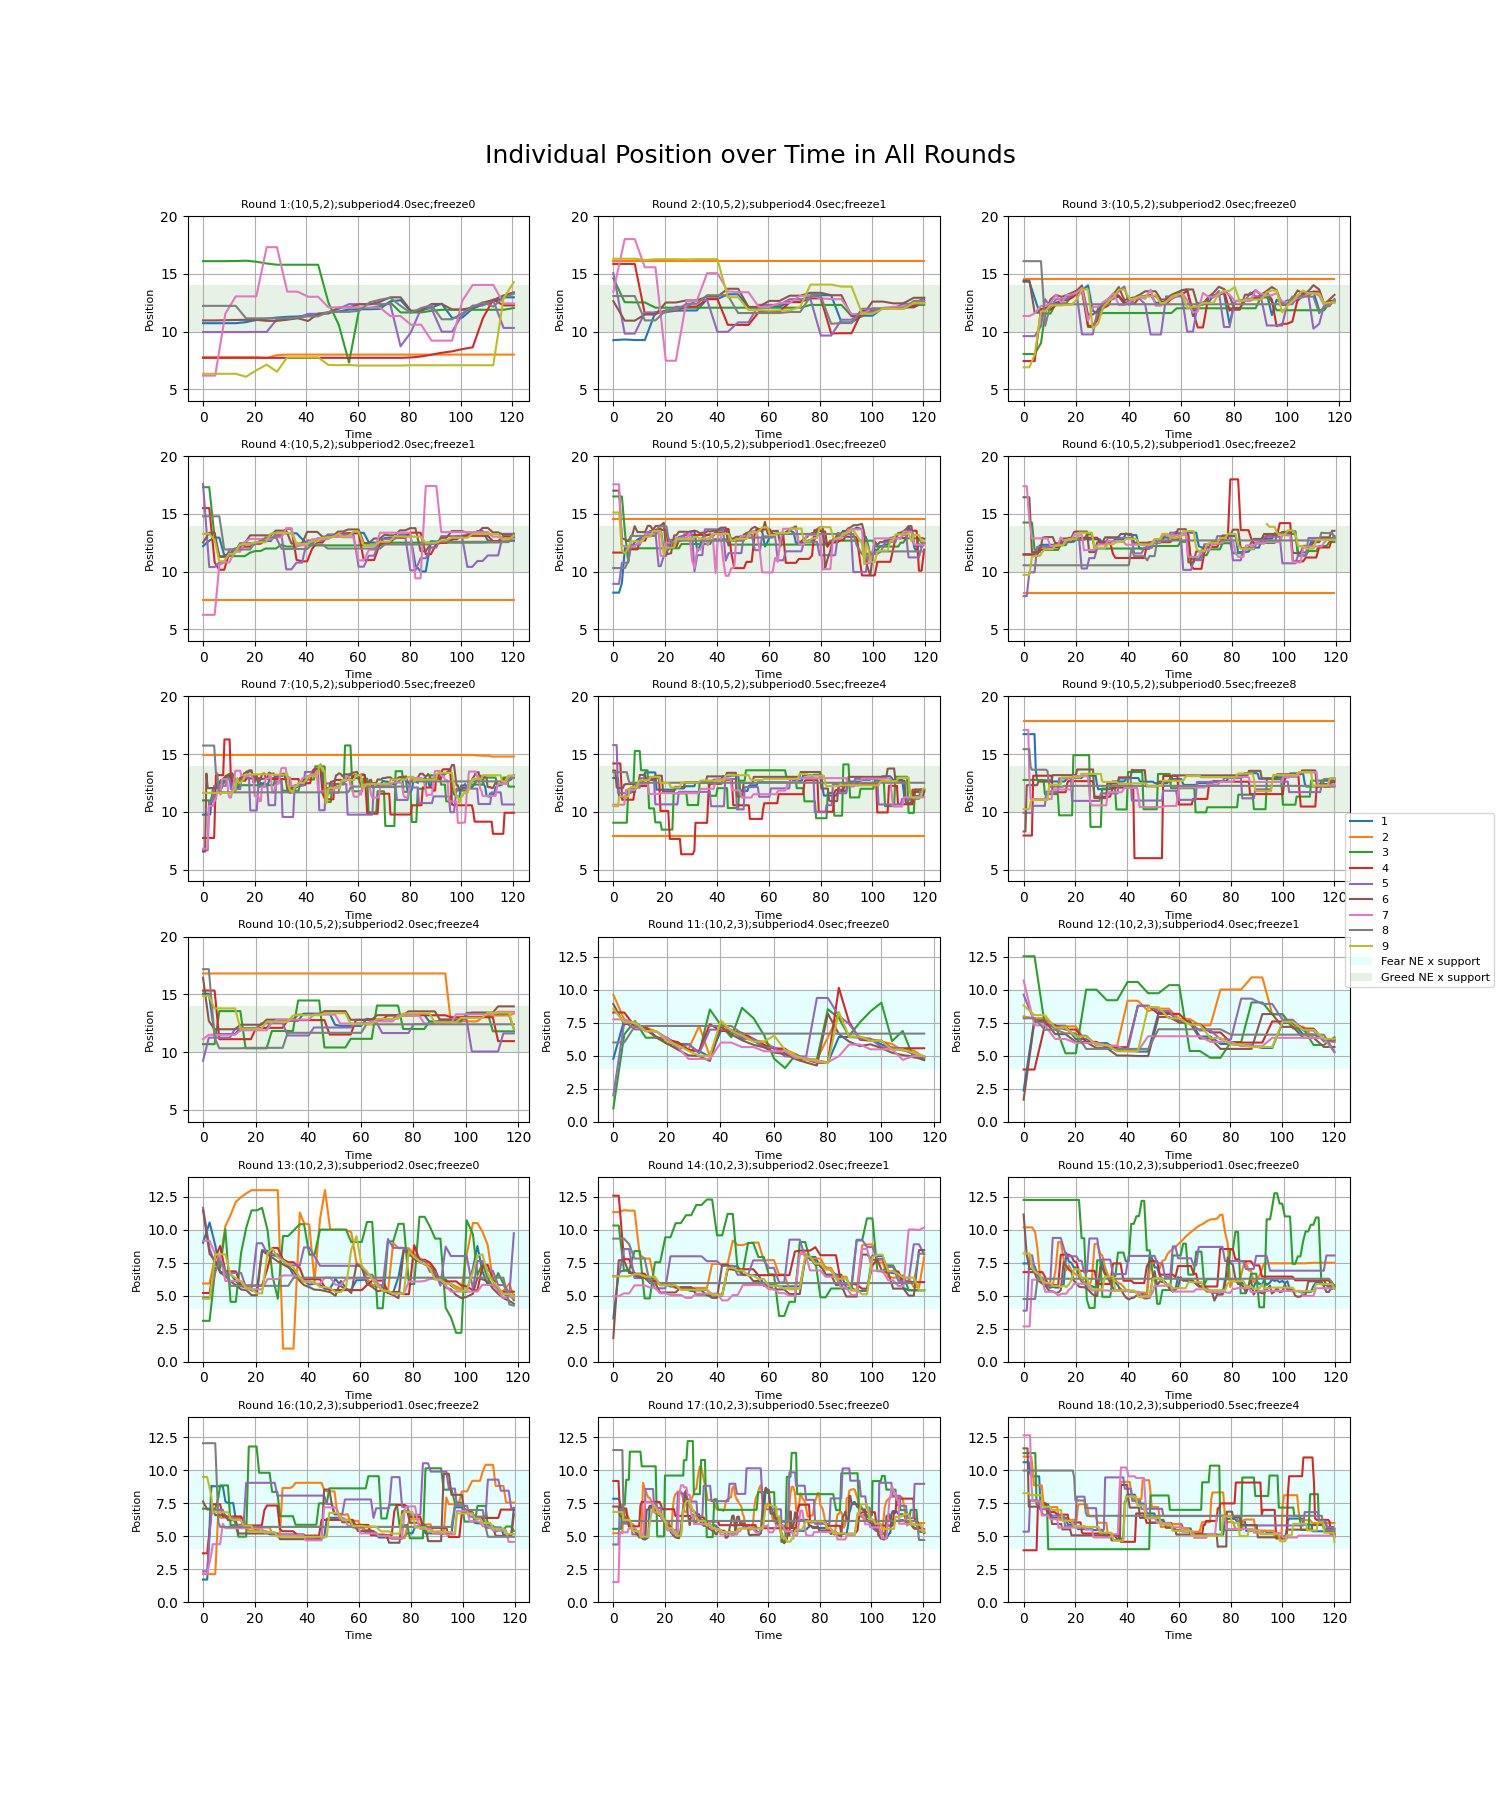

In [258]:
#generate positions over time in all rounds
df = df_copy[df_copy['strategy'] < 100]
handles2 = []
labels2 = []
# df = df[(df['id_in_group']==1)|(df['id_in_group']>3)]
freeze_period_list = [0,1,0,1,0,2,0,4,8,4,0,1,0,1,0,2,0,4]
ylim = [[4,20], [0,14]]
# yticks = [[5,19], [0,14]]
NE_support = [[10,14], [4,10]]
# player_label = list(range(1,10))
rows = 6
cols = 3
fig = plt.figure(figsize=(5*cols,3*rows)) #single 5*3
fig.subplots_adjust(hspace=0.3, wspace=0.2)
for i in range(1, rows*cols+1):
    df_round = df[df['round_number']==i]
    subperiod = df_round.iloc[0]['subperiod']
    lam = int(df_round.iloc[0]['lambda'])
    gam = int(df_round.iloc[0]['gamma'])
    rho = int(df_round.iloc[0]['rho'])
    freeze = freeze_period_list[i-1]
    df_round = df_round.pivot(index='seconds', columns='id_in_group', values='strategy')
    player_label = df_round.columns
    title = 'Round ' +str(i) + ':'+'('+str(lam) +','+str(gam) +','+str(rho) +');'+ 'subperiod' + str(subperiod) + 'sec;freeze'+str(freeze)
    ax = fig.add_subplot(rows, cols, i)
    ax.plot(df_round, label=player_label)
    ax.set_title(title, fontsize=8)
    ax.set_xlabel('Time', fontsize=8)
    ax.set_ylabel('Position', fontsize=8)
    if gam == 5:
        ax.set_ylim(ylim[0])
#         ax.set_yticks(yticks[0])
        ax.axhspan(NE_support[0][0], NE_support[0][1], facecolor ='g', alpha = 0.1, label='Greed NE x support')
        handles1, labels1 = ax.get_legend_handles_labels()
    else:
        ax.set_ylim(ylim[1])
#         ax.set_yticks(yticks[1])
        ax.axhspan(NE_support[1][0], NE_support[1][1], facecolor ='cyan', alpha = 0.1, label='Fear NE x support')
        handles2, labels2 = ax.get_legend_handles_labels()
    ax.grid()
handles2.append(handles1[-1])
labels2.append(labels1[-1])
fig.legend(handles2, labels2, loc='center right', fontsize=8)
fig.suptitle('Individual Position over Time in All Rounds', y=0.92, fontsize=18)
plt.show()
plt.savefig('position_over_time_all.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


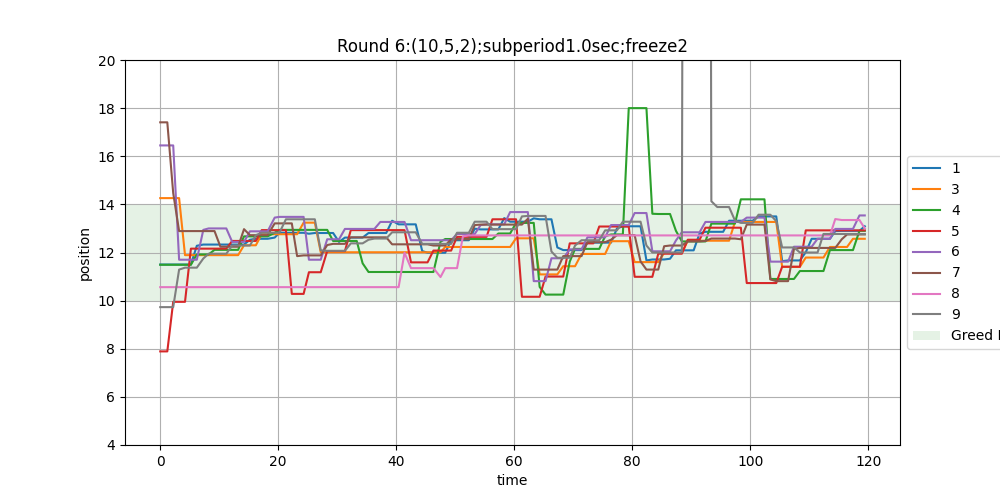

In [4]:
#generate strategy over time graph in all rounds
%matplotlib notebook
df = df_copy[df_copy['strategy'] < 100]
# df = df_copy[df_copy['id_in_group'] != 2]
handles = []
labels = []
freeze_period_list = [0,1,0,1,0,2,0,4,8,4,0,1,0,1,0,2,0,4]
ylim = [[4,20], [0,14]]
# yticks = [[5,19], [0,14]]
NE_support = [[10,14], [4,10]]

for i in range(6,7):
    df_round = df[df['round_number']==i]
    subperiod = df_round.iloc[0]['subperiod']
    lam = int(df_round.iloc[0]['lambda'])
    gam = int(df_round.iloc[0]['gamma'])
    rho = int(df_round.iloc[0]['rho'])
    freeze = freeze_period_list[i-1]
    title = 'Round ' +str(i) + ':'+'('+str(lam) +','+str(gam) +','+str(rho) +');'+ 'subperiod' + str(subperiod) + 'sec;freeze'+str(freeze)
    df_round = df_round.pivot(index='seconds', columns='id_in_group', values='strategy')
    df_round.plot(kind="line", figsize=(10, 5), label='Player ID')
    plt.xlabel('time')
    plt.ylabel('position')
    if gam == 5:
        plt.ylim(ylim[0])
        plt.axhspan(NE_support[0][0], NE_support[0][1], facecolor ='g', alpha = 0.1, label='Greed NE x support')
#         handles, labels = plt.get_legend_handles_labels()
    else:
        plt.ylim(ylim[1])
        plt.axhspan(NE_support[1][0], NE_support[1][1], facecolor ='cyan', alpha = 0.1, label='Fear NE x support')
#         handles, labels = plt.get_legend_handles_labels()
    plt.title(title)
    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    figure_name = str(lam) +'_'+str(gam) +'_'+str(rho) + '_subperiod' + str(subperiod) + '_freeze'+str(freeze)+ '_round'+str(i)
    plt.savefig(figure_name +'.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


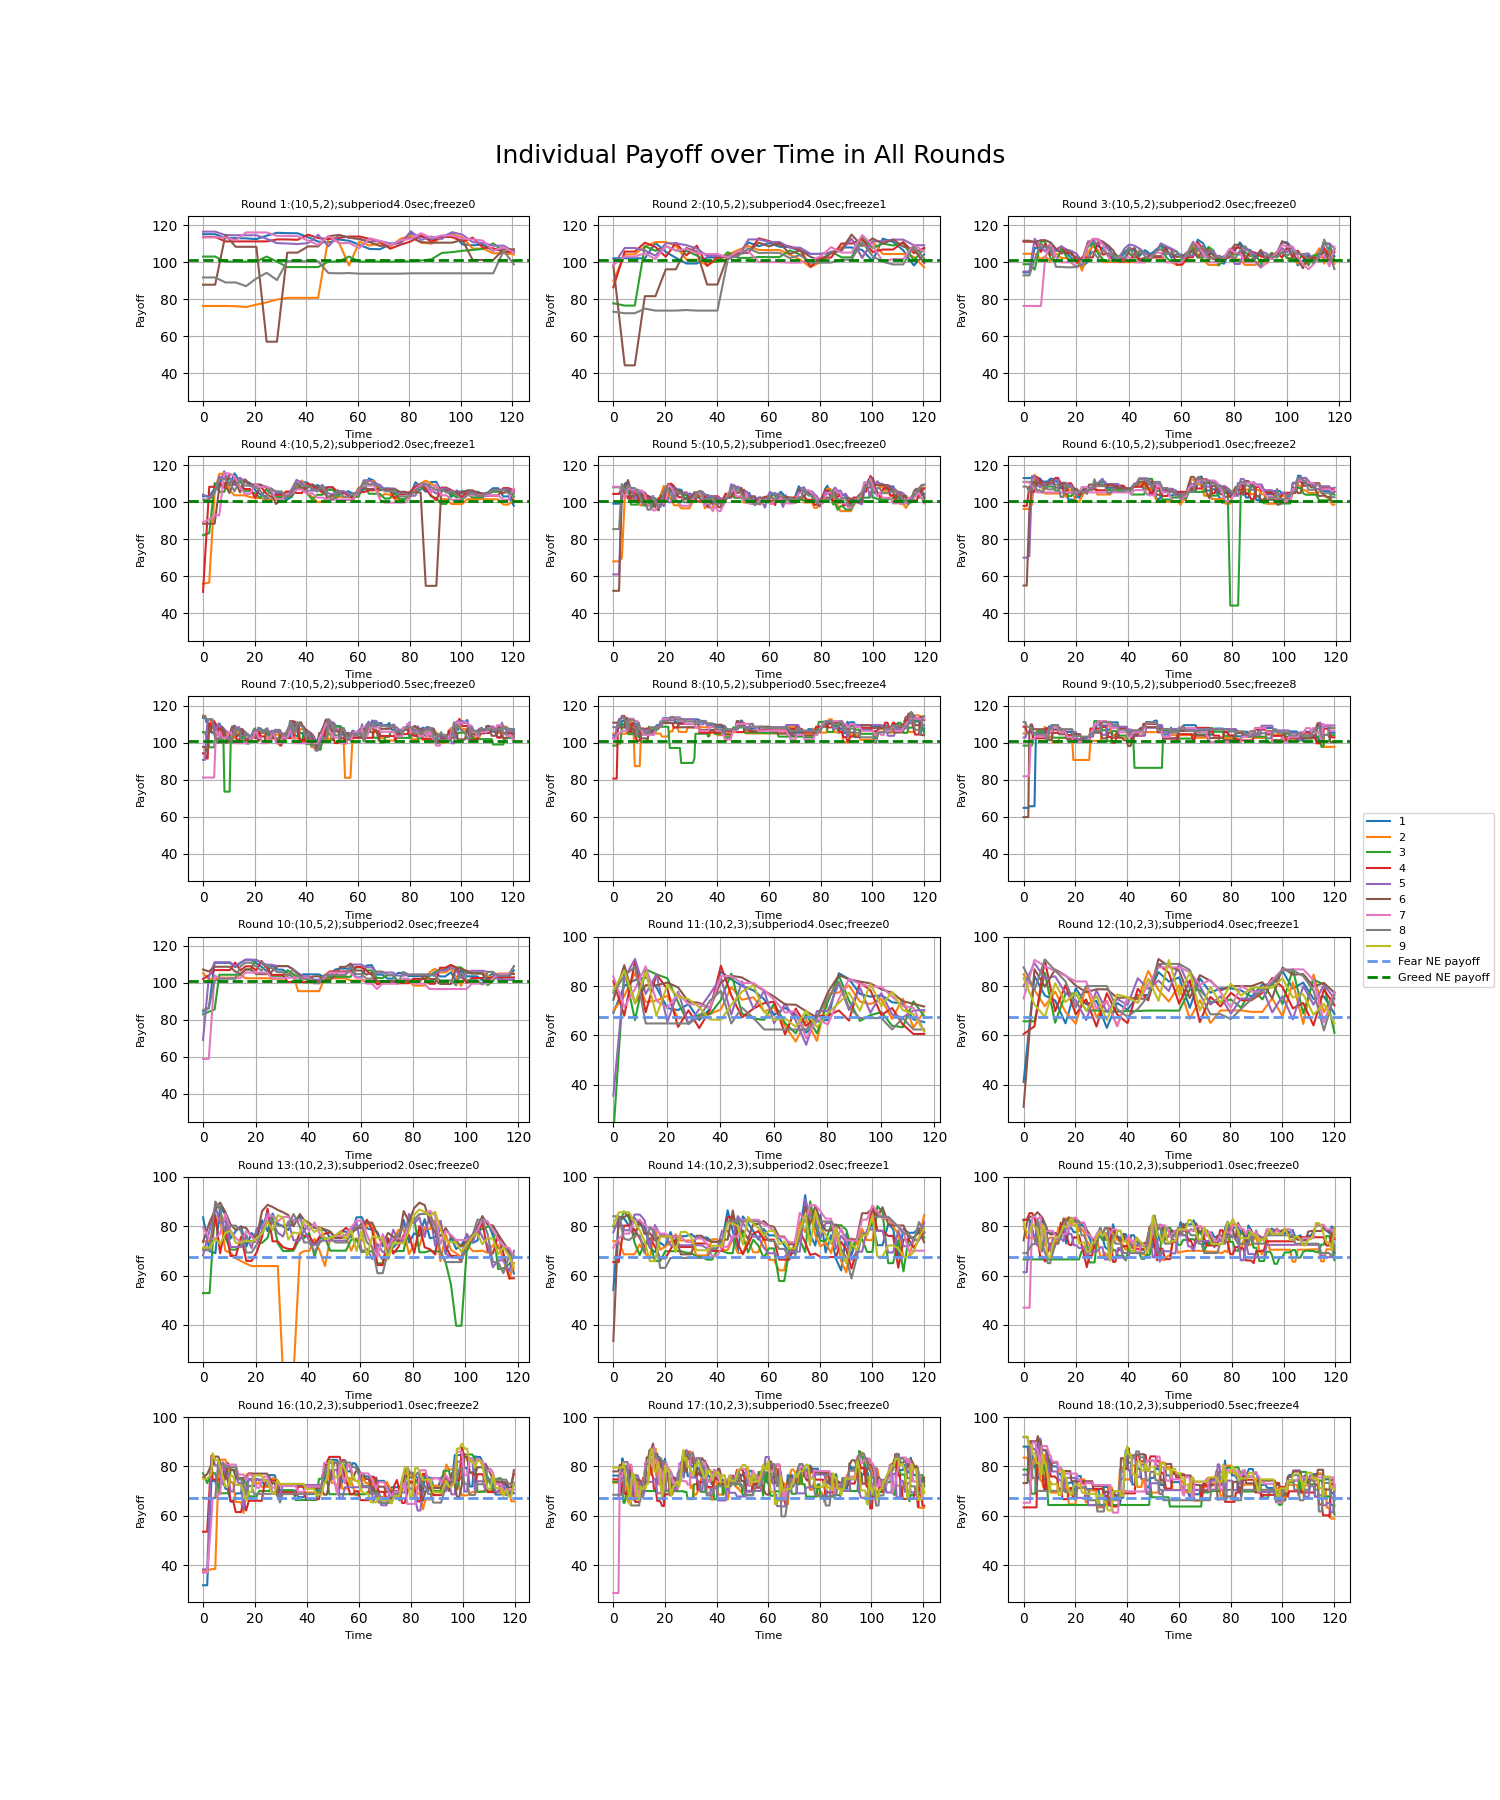

[<matplotlib.lines.Line2D object at 0x2839abfa0>, <matplotlib.lines.Line2D object at 0x2839af040>, <matplotlib.lines.Line2D object at 0x2839af160>, <matplotlib.lines.Line2D object at 0x2839af280>, <matplotlib.lines.Line2D object at 0x2839af3a0>, <matplotlib.lines.Line2D object at 0x2839af4c0>, <matplotlib.lines.Line2D object at 0x2839af5e0>, <matplotlib.lines.Line2D object at 0x2839af700>, <matplotlib.lines.Line2D object at 0x2839af820>, <matplotlib.lines.Line2D object at 0x283985970>, <matplotlib.lines.Line2D object at 0x2833a4dc0>] ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'Fear NE payoff', 'Greed NE payoff']


In [128]:
#generate payoffs over time in all rounds
df = df_copy[df_copy['strategy'] < 100]
df = df.drop(df[(df['round_number'] < 11) & (df['id_in_group'] == 2)].index)
handles2 = []
labels2 = []
# df = df[(df['id_in_group']==1)|(df['id_in_group']>3)]
freeze_period_list = [0,1,0,1,0,2,0,4,8,4,0,1,0,1,0,2,0,4]
ylim = [[25,125], [25,100]]
# yticks = [[5,19], [0,14]]
NE_payoff = [101, 67.33]
# player_label = list(range(1,10))
rows = 6
cols = 3
fig = plt.figure(figsize=(5*cols,3*rows)) #single 5*3
fig.subplots_adjust(hspace=0.3, wspace=0.2)
for i in range(1, rows*cols+1):
    df_round = df[df['round_number']==i]
    player_label = df_round.id_in_group.unique()
    player_label.sort()
    subperiod = df_round.iloc[0]['subperiod']
    lam = int(df_round.iloc[0]['lambda'])
    gam = int(df_round.iloc[0]['gamma'])
    rho = int(df_round.iloc[0]['rho'])
    freeze = freeze_period_list[i-1]
    df_round = df_round.pivot(index='seconds', columns='id_in_group', values='payoff')
#     player_label = df_round.columns
    title = 'Round ' +str(i) + ':'+'('+str(lam) +','+str(gam) +','+str(rho) +');'+ 'subperiod' + str(subperiod) + 'sec;freeze'+str(freeze)
    ax = fig.add_subplot(rows, cols, i)
    ax.plot(df_round, label=player_label)
    ax.set_title(title, fontsize=8)
    ax.set_xlabel('Time', fontsize=8)
    ax.set_ylabel('Payoff', fontsize=8)
    if gam == 5:
        ax.set_ylim(ylim[0])
#         ax.set_yticks(yticks[0])
        ax.axhline(y=NE_payoff[0], color='green', linestyle='--',linewidth=2, label='Greed NE payoff')
        handles1, labels1 = ax.get_legend_handles_labels()
    else:
        ax.set_ylim(ylim[1])
#         ax.set_yticks(yticks[1])
        ax.axhline(y=NE_payoff[1], color='cornflowerblue', linestyle='--',linewidth=2, label='Fear NE payoff')
        handles2, labels2 = ax.get_legend_handles_labels()
    ax.grid()
handles2.append(handles1[-1])
labels2.append(labels1[-1])
print(handles2, labels2)
fig.legend(handles2, labels2, loc='center right', fontsize=8)
fig.suptitle('Individual Payoff over Time in All Rounds', y=0.92, fontsize=18)
plt.show()
# plt.savefig('payoff_over_time_all.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


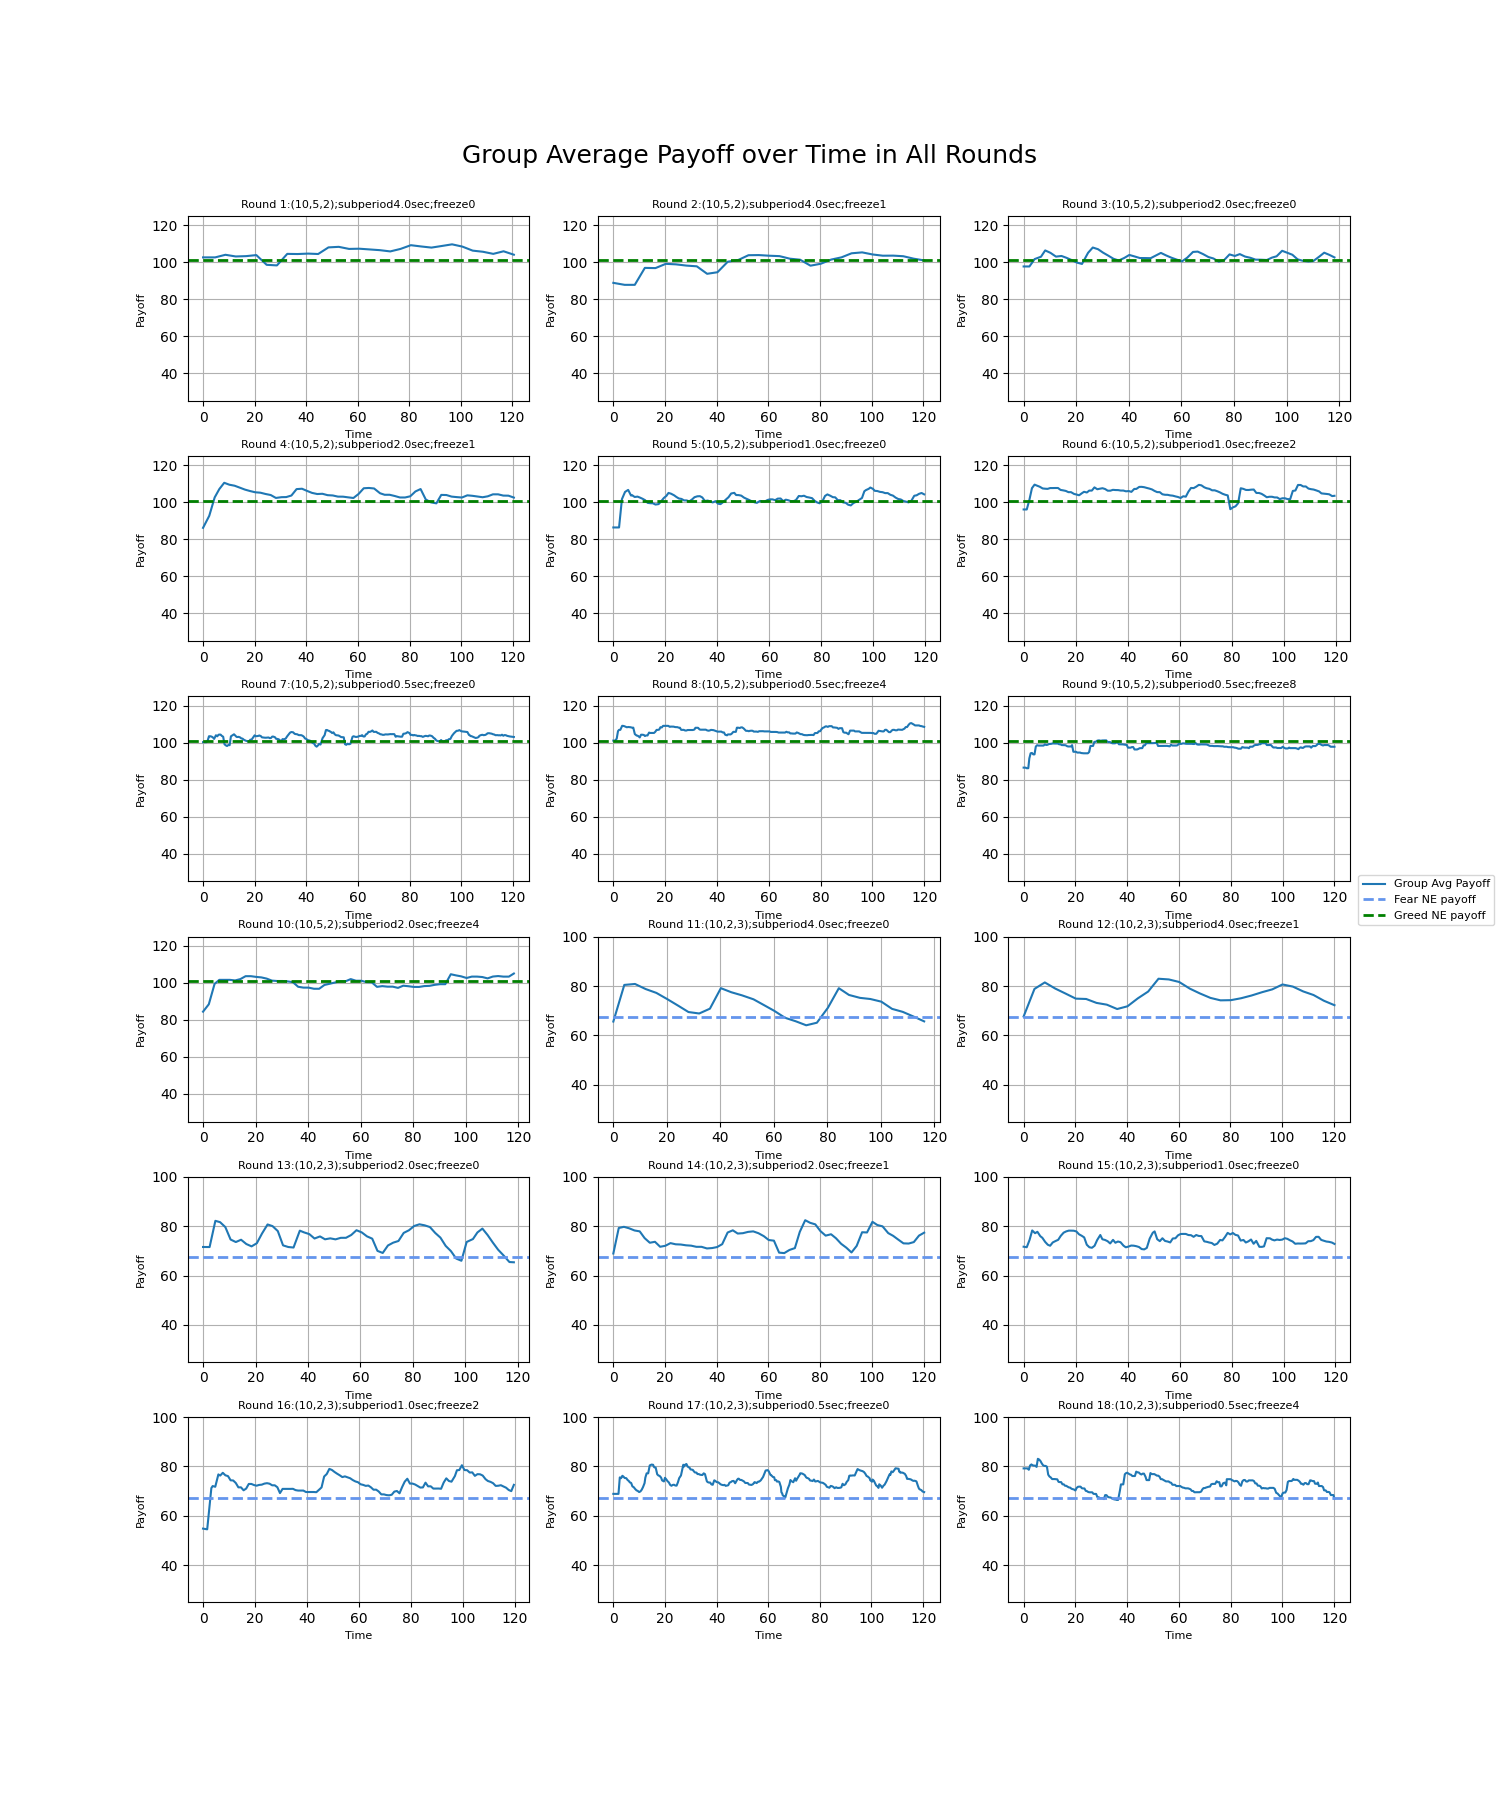

[<matplotlib.lines.Line2D object at 0x283913c70>, <matplotlib.lines.Line2D object at 0x15c9cc7c0>, <matplotlib.lines.Line2D object at 0x2852586d0>] ['Group Avg Payoff', 'Fear NE payoff', 'Greed NE payoff']


In [127]:
#group average over time in all rounds
#generate payoffs over time in all rounds
df = df_copy[df_copy['strategy'] < 100]

handles2 = []
labels2 = []
# df = df[(df['id_in_group']==1)|(df['id_in_group']>3)]
freeze_period_list = [0,1,0,1,0,2,0,4,8,4,0,1,0,1,0,2,0,4]
ylim = [[25,125], [25,100]]
# yticks = [[5,19], [0,14]]
NE_payoff = [101, 67.33]
# player_label = list(range(1,10))
rows = 6
cols = 3
fig = plt.figure(figsize=(5*cols,3*rows)) #single 5*3
fig.subplots_adjust(hspace=0.3, wspace=0.2)
for i in range(1, rows*cols+1):
    df_round = df[df['round_number']==i]
#     player_label = df_round.id_in_group.unique()
#     player_label.sort()
    subperiod = df_round.iloc[0]['subperiod']
    lam = int(df_round.iloc[0]['lambda'])
    gam = int(df_round.iloc[0]['gamma'])
    rho = int(df_round.iloc[0]['rho'])
    freeze = freeze_period_list[i-1]
    df_round = df_round.groupby('seconds')['payoff'].mean()
#     df_round = df_round.reset_index()
    title = 'Round ' +str(i) + ':'+'('+str(lam) +','+str(gam) +','+str(rho) +');'+ 'subperiod' + str(subperiod) + 'sec;freeze'+str(freeze)
    ax = fig.add_subplot(rows, cols, i)
    ax.plot(df_round, label='Group Avg Payoff')
    ax.set_title(title, fontsize=8)
    ax.set_xlabel('Time', fontsize=8)
    ax.set_ylabel('Payoff', fontsize=8)
    if gam == 5:
        ax.set_ylim(ylim[0])
#         ax.set_yticks(yticks[0])
        ax.axhline(y=NE_payoff[0], color='green', linestyle='--',linewidth=2, label='Greed NE payoff')
        handles1, labels1 = ax.get_legend_handles_labels()
    else:
        ax.set_ylim(ylim[1])
#         ax.set_yticks(yticks[1])
        ax.axhline(y=NE_payoff[1], color='cornflowerblue', linestyle='--',linewidth=2, label='Fear NE payoff')
        handles2, labels2 = ax.get_legend_handles_labels()
    ax.grid()
handles2.append(handles1[-1])
labels2.append(labels1[-1])
print(handles2, labels2)
fig.legend(handles2, labels2, loc='center right', fontsize=8)
fig.suptitle('Group Average Payoff over Time in All Rounds', y=0.92, fontsize=18)
plt.show()
plt.savefig('group_avg_payoff_over_time_all.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


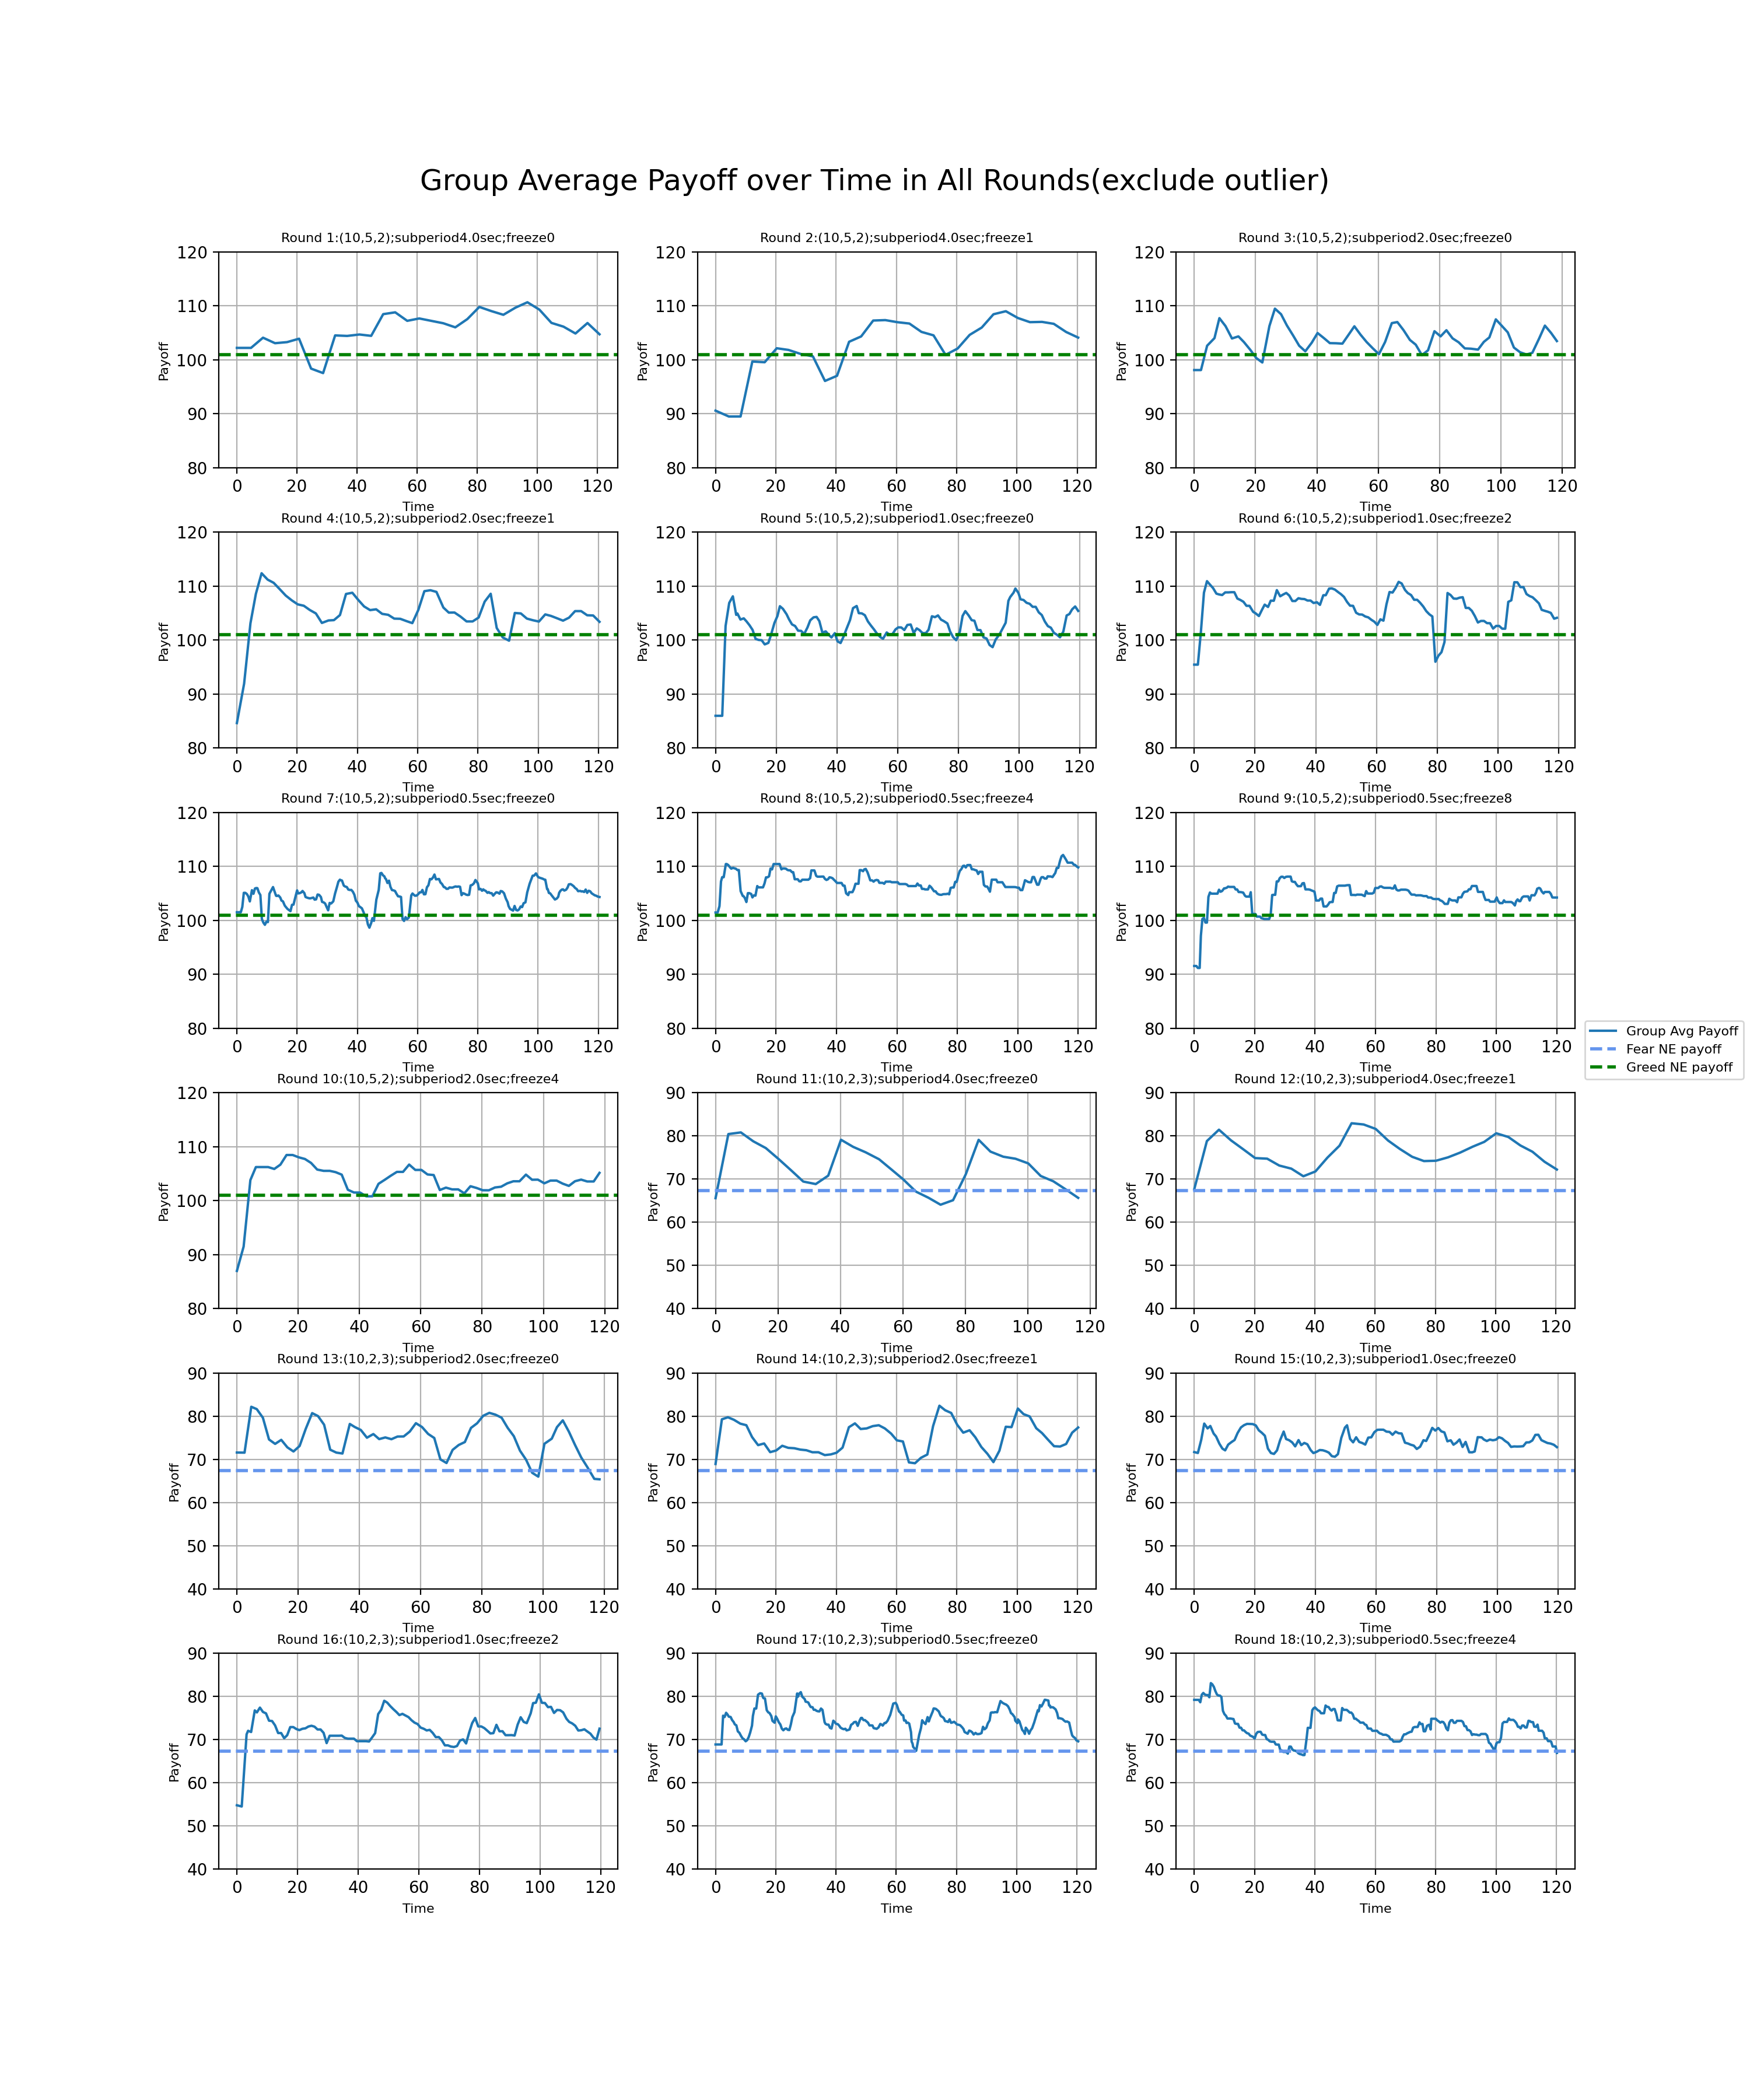

[<matplotlib.lines.Line2D object at 0x163eda460>, <matplotlib.lines.Line2D object at 0x143a25eb0>, <matplotlib.lines.Line2D object at 0x163d386d0>] ['Group Avg Payoff', 'Fear NE payoff', 'Greed NE payoff']


In [55]:
#group average over time in all rounds (exclude outlier )
df = df_copy[df_copy['strategy'] < 100]
df = df.drop(df[(df['round_number'] < 11) & (df['id_in_group'] == 2)].index)
handles2 = []
labels2 = []
# df = df[(df['id_in_group']==1)|(df['id_in_group']>3)]
freeze_period_list = [0,1,0,1,0,2,0,4,8,4,0,1,0,1,0,2,0,4]
ylim = [[80,120], [40,90]]
# yticks = [[5,19], [0,14]]
NE_payoff = [101, 67.33]
# player_label = list(range(1,10))
rows = 6
cols = 3
fig = plt.figure(figsize=(5*cols,3*rows)) #single 5*3
fig.subplots_adjust(hspace=0.3, wspace=0.2)
for i in range(1, rows*cols+1):
    df_round = df[df['round_number']==i]
#     player_label = df_round.id_in_group.unique()
#     player_label.sort()
    subperiod = df_round.iloc[0]['subperiod']
    lam = int(df_round.iloc[0]['lambda'])
    gam = int(df_round.iloc[0]['gamma'])
    rho = int(df_round.iloc[0]['rho'])
    freeze = freeze_period_list[i-1]
    df_round = df_round.groupby('seconds')['payoff'].mean()
#     df_round = df_round.reset_index()
    title = 'Round ' +str(i) + ':'+'('+str(lam) +','+str(gam) +','+str(rho) +');'+ 'subperiod' + str(subperiod) + 'sec;freeze'+str(freeze)
    ax = fig.add_subplot(rows, cols, i)
    ax.plot(df_round, label='Group Avg Payoff')
    ax.set_title(title, fontsize=8)
    ax.set_xlabel('Time', fontsize=8)
    ax.set_ylabel('Payoff', fontsize=8)
    if gam == 5:
        ax.set_ylim(ylim[0])
#         ax.set_yticks(yticks[0])
        ax.axhline(y=NE_payoff[0], color='green', linestyle='--',linewidth=2, label='Greed NE payoff')
        handles1, labels1 = ax.get_legend_handles_labels()
    else:
        ax.set_ylim(ylim[1])
#         ax.set_yticks(yticks[1])
        ax.axhline(y=NE_payoff[1], color='cornflowerblue', linestyle='--',linewidth=2, label='Fear NE payoff')
        handles2, labels2 = ax.get_legend_handles_labels()
    ax.grid()
handles2.append(handles1[-1])
labels2.append(labels1[-1])
print(handles2, labels2)
fig.legend(handles2, labels2, loc='center right', fontsize=8)
fig.suptitle('Group Average Payoff over Time in All Rounds(exclude outlier)', y=0.92, fontsize=18)
plt.show()
plt.savefig('group_avg_payoff_over_time_all_without_outlier.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


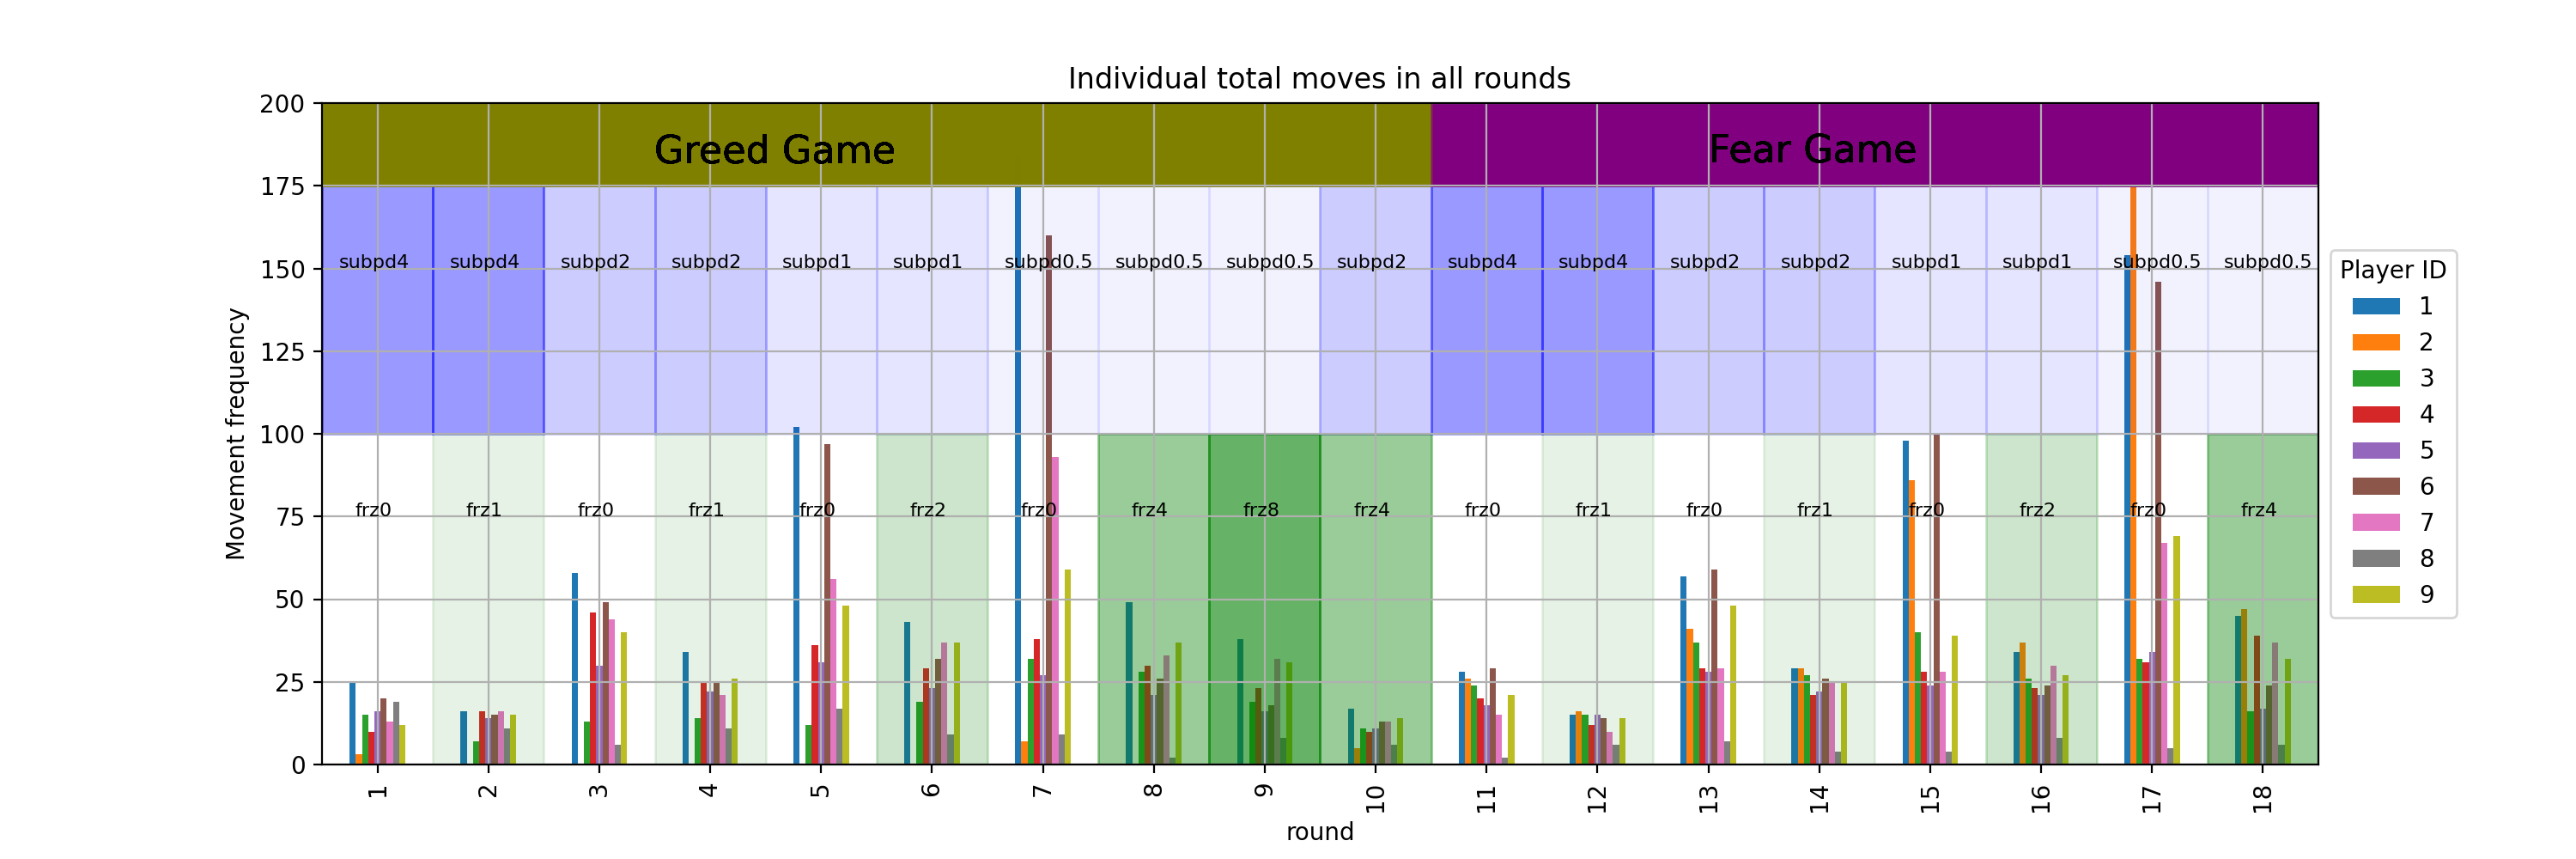

In [218]:
#generate move frequency
freeze_period_list = [0,1,0,1,0,2,0,4,8,4,0,1,0,1,0,2,0,4]
subperiod_list = [4,4,2,2,1,1,0.5,0.5,0.5,2,4,4,2,2,1,1,0.5,0.5]
color_list = [0,1,0,1,0,2,0,4,6,4,0,1,0,1,0,2,0,4]
df = df_copy[df_copy['strategy'] < 100]
df_groupby_id_round = df.groupby(['round_number', 'id_in_group']).sum()
df_groupby_id_round = df_groupby_id_round.reset_index()
df_bar = df_groupby_id_round[['round_number', 'id_in_group','move']]
df_bar = df_bar.pivot(index='round_number', columns='id_in_group', values='move')
# as_list = df_bar.index.tolist()
# new_index = []
# for i in range(18):
#     ele = str(as_list[i]) + ' (Freeze' + str(freeze_period_list[i])+ ')'
#     new_index.append(ele)
# df_bar.index = new_index
%matplotlib notebook
df_bar.plot.bar(figsize=(15, 5))
for i in range(18):
    plt.text(i-0.2, 75, 'frz'+str(freeze_period_list[i]), fontsize = 8)
    plt.text(i-0.35, 150, 'subpd'+str(subperiod_list[i]), fontsize = 8)
    plt.axvspan(xmin=i-0.5, xmax=i+0.5, alpha=color_list[i]/10, color='g', ymin=0, ymax=1/2)
    plt.axvspan(xmin=i-0.5, xmax=i+0.5, alpha=subperiod_list[i]/10, color='b', ymin=1/2, ymax=7/8)
    plt.text(2.5, 182, 'Greed Game', fontsize = 16)
    plt.text(12, 182, 'Fear Game', fontsize = 16)
    plt.axvspan(xmin=-0.5, xmax=9.5, alpha=0.4, color='olive', ymin=7/8, ymax=1)
    plt.axvspan(xmin=9.5, xmax=17.5, alpha=0.4, color='purple', ymin=7/8, ymax=1)
plt.ylim([0,200])
plt.xlabel('round')
plt.ylabel('Movement frequency')
plt.title('Individual total moves in all rounds')
plt.grid()
plt.legend(title='Player ID', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.savefig('move_frequency_all.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


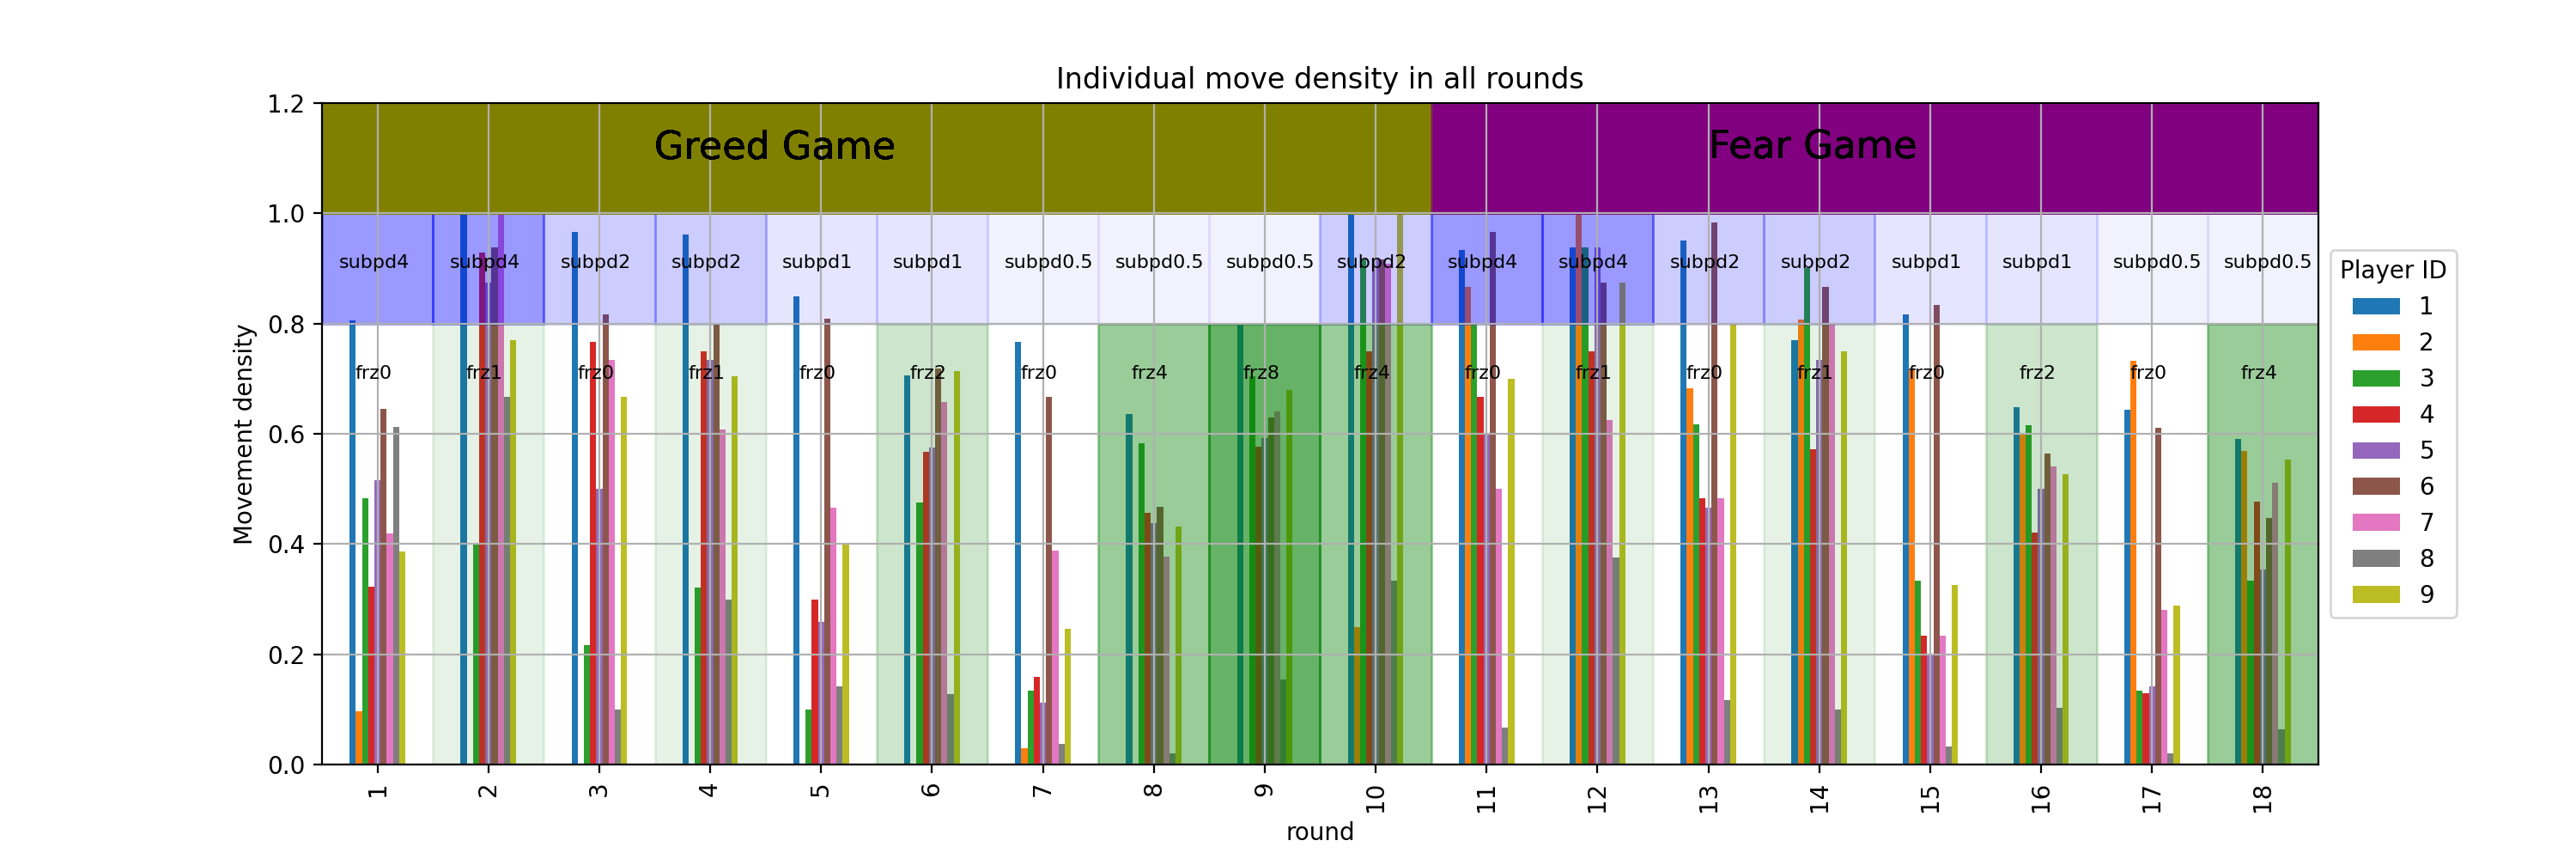

In [54]:
#move density in all round
freeze_period_list = [0,1,0,1,0,2,0,4,8,4,0,1,0,1,0,2,0,4]
subperiod_list = [4,4,2,2,1,1,0.5,0.5,0.5,2,4,4,2,2,1,1,0.5,0.5]
color_list = [0,1,0,1,0,2,0,4,6,4,0,1,0,1,0,2,0,4]
df = df_copy[df_copy['strategy'] < 100]
df = df.drop(df[(df['move'] == 1) & (df['if_freeze_now'] == 1)].index)
df['count'] = 1
# df['if_self_freeze'] = 0
# df.loc[(df['move']==0) & (df['if_freeze_now']==0), 'if_self_freeze'] = 1

df_groupby_id_round = df.groupby(['round_number', 'id_in_group']).sum()
df_groupby_id_round = df_groupby_id_round.reset_index()
# df_groupby_id_round['subperiod_copy'] = df_groupby_id_round['subperiod']/df_groupby_id_round['count']
for i in range(18):
    df_groupby_id_round.loc[df_groupby_id_round['round_number']==i+1, 'freeze_time'] = freeze_period_list[i]
df_groupby_id_round['potential_move'] = df_groupby_id_round['count']/(df_groupby_id_round['freeze_time']+1)
df_groupby_id_round.potential_move = df_groupby_id_round.potential_move.round()
# df_groupby_id_round['possible_move'] = df_groupby_id_round['move'] + df_groupby_id_round['if_self_freeze']
# df_groupby_id_round['move_density'] = df_groupby_id_round['move']/df_groupby_id_round['possible_move']
df_groupby_id_round['move_density'] = df_groupby_id_round['move']/df_groupby_id_round['potential_move']
df_bar = df_groupby_id_round[['round_number', 'id_in_group','move_density']]
df_bar = df_bar.pivot(index='round_number', columns='id_in_group', values='move_density')
# as_list = df_bar.index.tolist()
# new_index = []
# for i in range(18):
#     ele = str(as_list[i]) + ' (Freeze' + str(freeze_period_list[i])+ ')'
#     new_index.append(ele)
# df_bar.index = new_index
%matplotlib notebook
df_bar.plot.bar(figsize=(15, 5))
for i in range(18):
    plt.text(i-0.2, 0.7, 'frz'+str(freeze_period_list[i]), fontsize = 8)
    plt.text(i-0.35, 0.9, 'subpd'+str(subperiod_list[i]), fontsize = 8)
    plt.axvspan(xmin=i-0.5, xmax=i+0.5, alpha=color_list[i]/10, color='g', ymin=0, ymax=2/3)
    plt.axvspan(xmin=i-0.5, xmax=i+0.5, alpha=subperiod_list[i]/10, color='b', ymin=2/3, ymax=5/6)
    plt.text(2.5, 1.1, 'Greed Game', fontsize = 16)
    plt.text(12, 1.1, 'Fear Game', fontsize = 16)
    plt.axvspan(xmin=-0.5, xmax=9.5, alpha=0.4, color='olive', ymin=5/6, ymax=1)
    plt.axvspan(xmin=9.5, xmax=17.5, alpha=0.4, color='purple', ymin=5/6, ymax=1)
plt.ylim([0,1.2])
plt.xlabel('round')
plt.ylabel('Movement density')
plt.title('Individual move density in all rounds')
plt.grid()
plt.legend(title='Player ID', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.savefig('move_density_all.png', bbox_inches='tight')

In [51]:
df_groupby_id_round.potential_move.unique()

array([ 31.,  14.,  16.,  15.,  13.,  60.,  26.,  30.,  28.,  27., 120.,
        34.,  40.,  37.,  39.,  35., 240.,  44.,  48.,  46.,  47.,  45.,
        25.,  11.,  12.,  38., 239.])

/var/folders/15/djmbdtz95_34fcrr8nrcvk_40000gn/T/ipykernel_3579/3741618767.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['if_self_freeze'] = 0


<IPython.core.display.Javascript object>


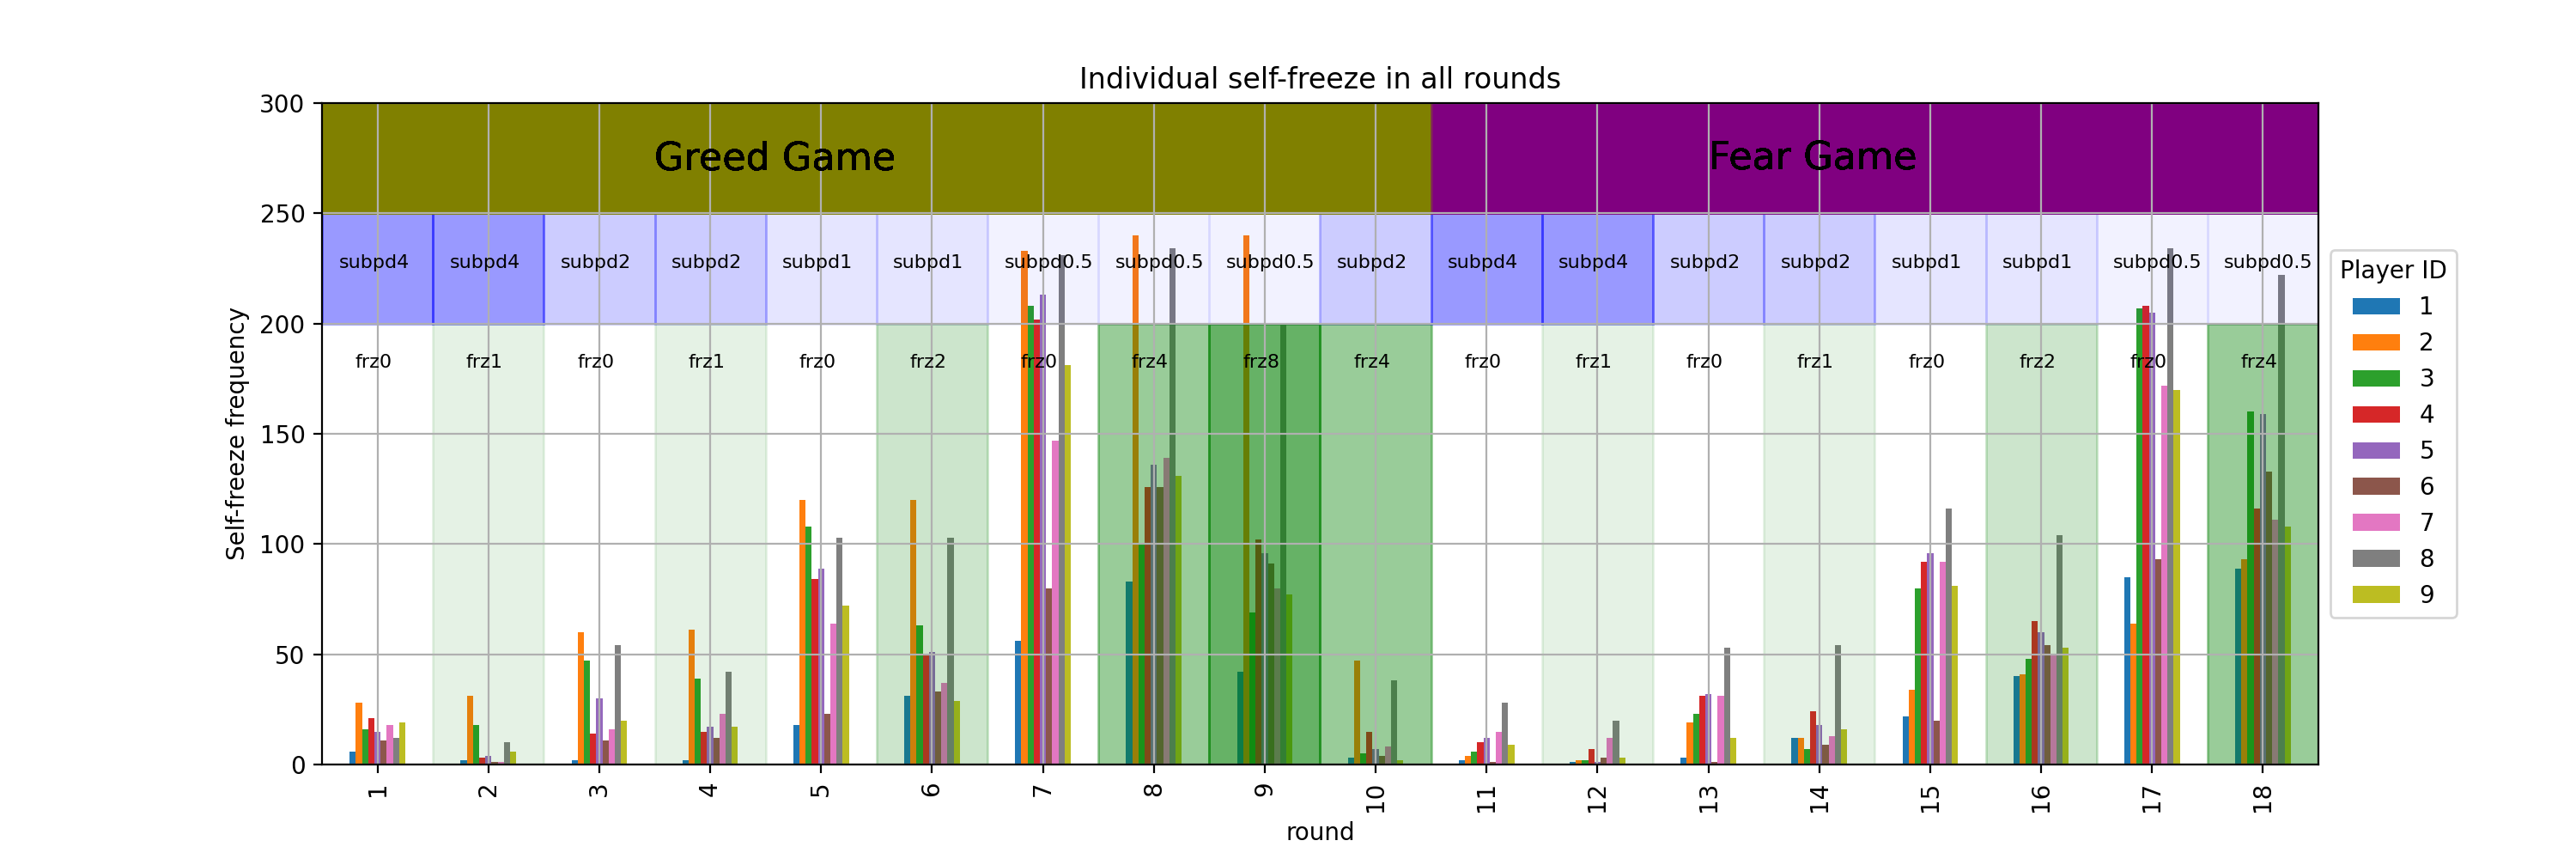

In [217]:
#generate if self freeze
freeze_period_list = [0,1,0,1,0,2,0,4,8,4,0,1,0,1,0,2,0,4]
subperiod_list = [4,4,2,2,1,1,0.5,0.5,0.5,2,4,4,2,2,1,1,0.5,0.5]
color_list = [0,1,0,1,0,2,0,4,6,4,0,1,0,1,0,2,0,4]
df = df_copy[df_copy['strategy'] < 100]

df['if_self_freeze'] = 0
df.loc[(df['move']==0) & (df['if_freeze_now']==0), 'if_self_freeze'] = 1
df_groupby_id_round = df.groupby(['round_number', 'id_in_group']).sum()
df_groupby_id_round = df_groupby_id_round.reset_index()
df_bar = df_groupby_id_round[['round_number', 'id_in_group','if_self_freeze']]
df_bar = df_bar.pivot(index='round_number', columns='id_in_group', values='if_self_freeze')
# as_list = df_bar.index.tolist()
# new_index = []
# for i in range(18):
#     ele = str(as_list[i]) + ' (Freeze' + str(freeze_period_list[i])+ ')'
#     new_index.append(ele)
# df_bar.index = new_index
%matplotlib notebook
df_bar.plot.bar(figsize=(15, 5))
for i in range(18):
    plt.text(i-0.2, 180, 'frz'+str(freeze_period_list[i]), fontsize = 8)
    plt.text(i-0.35, 225, 'subpd'+str(subperiod_list[i]), fontsize = 8)
    plt.axvspan(xmin=i-0.5, xmax=i+0.5, alpha=color_list[i]/10, color='g', ymin=0, ymax=2/3)
    plt.axvspan(xmin=i-0.5, xmax=i+0.5, alpha=subperiod_list[i]/10, color='b', ymin=2/3, ymax=5/6)
    plt.text(2.5, 270, 'Greed Game', fontsize = 16)
    plt.text(12, 270, 'Fear Game', fontsize = 16)
    plt.axvspan(xmin=-0.5, xmax=9.5, alpha=0.4, color='olive', ymin=5/6, ymax=1)
    plt.axvspan(xmin=9.5, xmax=17.5, alpha=0.4, color='purple', ymin=5/6, ymax=1)
plt.ylim([0,300])
plt.xlabel('round')
plt.ylabel('Self-freeze frequency')
plt.title('Individual self-freeze in all rounds')
plt.grid()
plt.legend(title='Player ID', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.savefig('self_freeze_all.png', bbox_inches='tight')

In [17]:
#self freeze
freeze_period_list = [0,1,0,1,0,2,0,4,8,4,0,1,0,1,0,2,0,4]
subperiod_list = [4,4,2,2,1,1,0.5,0.5,0.5,2,4,4,2,2,1,1,0.5,0.5]
color_list = [0,1,0,1,0,2,0,4,6,4,0,1,0,1,0,2,0,4]
df = df_copy[df_copy['strategy'] < 100]
# df = df.drop(df[(df['round_number'] < 11) & (df['id_in_group'] == 2)].index)
df['count'] = 1
# df['if_self_freeze'] = 0
# df.loc[(df['move']==0) & (df['if_freeze_now']==0), 'if_self_freeze'] = 1
df_groupby_id_round = df.groupby(['round_number', 'id_in_group']).sum()
df_groupby_id_round = df_groupby_id_round.reset_index()
df_groupby_id_round['subperiod_copy'] = df_groupby_id_round['subperiod']/df_groupby_id_round['count']
for i in range(18):
    df_groupby_id_round.loc[df_groupby_id_round['round_number']==i+1, 'freeze_time'] = freeze_period_list[i]
df_groupby_id_round['potential_move'] = df_groupby_id_round['count']
df_groupby_id_round.loc[df_groupby_id_round['freeze_time']>0, 'potential_move'] = df_groupby_id_round['count']/(df_groupby_id_round['freeze_time']+1)

# df_groupby_id_round['possible_move'] = df_groupby_id_round['move'] + df_groupby_id_round['if_self_freeze']
# df_groupby_id_round['self_freeze_density'] = df_groupby_id_round['if_self_freeze']/df_groupby_id_round['possible_move']
df_groupby_id_round['move_density'] = df_groupby_id_round['move']/df_groupby_id_round['potential_move']
# df_bar = df_groupby_id_round[['round_number', 'id_in_group','self_freeze_density']]
# df_bar = df_bar.pivot(index='round_number', columns='id_in_group', values='self_freeze_density')
df_bar = df_groupby_id_round[['round_number', 'id_in_group','move_density']]
df_bar = df_bar.pivot(index='round_number', columns='id_in_group', values='move_density')

# as_list = df_bar.index.tolist()
# new_index = []
# for i in range(18):
#     ele = str(as_list[i]) + ' (Freeze' + str(freeze_period_list[i])+ ')'
#     new_index.append(ele)
# df_bar.index = new_index
# %matplotlib notebook
# df_bar.plot.bar(figsize=(15, 5))
# for i in range(18):
#     plt.text(i-0.2, 0.7, 'frz'+str(freeze_period_list[i]), fontsize = 8)
#     plt.text(i-0.35, 0.9, 'subpd'+str(subperiod_list[i]), fontsize = 8)
#     plt.axvspan(xmin=i-0.5, xmax=i+0.5, alpha=color_list[i]/10, color='g', ymin=0, ymax=2/3)
#     plt.axvspan(xmin=i-0.5, xmax=i+0.5, alpha=subperiod_list[i]/10, color='b', ymin=2/3, ymax=5/6)
#     plt.text(2.5, 1.1, 'Greed Game', fontsize = 16)
#     plt.text(12, 1.1, 'Fear Game', fontsize = 16)
#     plt.axvspan(xmin=-0.5, xmax=9.5, alpha=0.4, color='olive', ymin=5/6, ymax=1)
#     plt.axvspan(xmin=9.5, xmax=17.5, alpha=0.4, color='purple', ymin=5/6, ymax=1)
# plt.ylim([0,1.2])
# plt.xlabel('round')
# plt.ylabel('Self-freeze density')
# plt.title('Individual self freeze density in all rounds')
# plt.grid()
# plt.legend(title='Player ID', loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show()
# plt.savefig('self_freeze_density_all.png', bbox_inches='tight')

/var/folders/15/djmbdtz95_34fcrr8nrcvk_40000gn/T/ipykernel_99427/4148674764.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count'] = 1


id_in_group          1         2         3         4         5         6  \
round_number                                                               
1             0.806452  0.096774  0.483871  0.322581  0.516129  0.645161   
2             1.032258  0.000000  0.451613  1.032258  0.903226  0.967742   
3             0.966667  0.000000  0.216667  0.766667  0.500000  0.816667   
4             1.114754  0.000000  0.459016  0.819672  0.721311  0.819672   
5             0.850000  0.000000  0.100000  0.300000  0.258333  0.808333   
6             1.075000  0.000000  0.475000  0.725000  0.575000  0.800000   
7             0.766667  0.029167  0.133333  0.158333  0.112500  0.666667   
8             1.020833  0.000000  0.583333  0.625000  0.437500  0.541667   
9             1.425000  0.000000  0.712500  0.862500  0.600000  0.675000   
10            1.416667  0.416667  0.916667  0.833333  0.916667  1.083333   
11            0.933333  0.866667  0.800000  0.666667  0.600000  0.966667   
12            0.967742  1.032258  0.967742  0.774194  0.967742  0.903226   
13            0.950000  0.683333  0.616667  0.483333  0.466667  0.983333   
14            0.950820  0.950820  0.885246  0.688525  0.721311  0.852459   
15            0.816667  0.716667  0.333333  0.233333  0.200000  0.833333   
16            0.850000  0.925000  0.650000  0.575000  0.525000  0.600000   
17            0.644351  0.732218  0.133891  0.129707  0.142259  0.610879   
18            0.937500  0.979167  0.333333  0.812500  0.354167  0.500000   

id_in_group          7         8         9  
round_number                                
1             0.419355  0.612903  0.387097  
2             1.032258  0.709677  0.967742  
3             0.733333  0.100000  0.666667  
4             0.688525  0.360656  0.852459  
5             0.466667  0.141667  0.400000  
6             0.925000  0.225000  0.956897  
7             0.387500  0.037500  0.245833  
8             0.687500  0.041667  0.770833  
9             1.200000  0.300000  1.162500  
10            1.083333  0.500000  1.166667  
11            0.500000  0.066667  0.700000  
12            0.645161  0.387097  0.903226  
13            0.483333  0.116667  0.800000  
14            0.819672  0.131148  0.819672  
15            0.233333  0.033333  0.325000  
16            0.750000  0.200000  0.675000  
17            0.280335  0.020921  0.288703  
18            0.770833  0.125000  0.666667

<IPython.core.display.Javascript object>


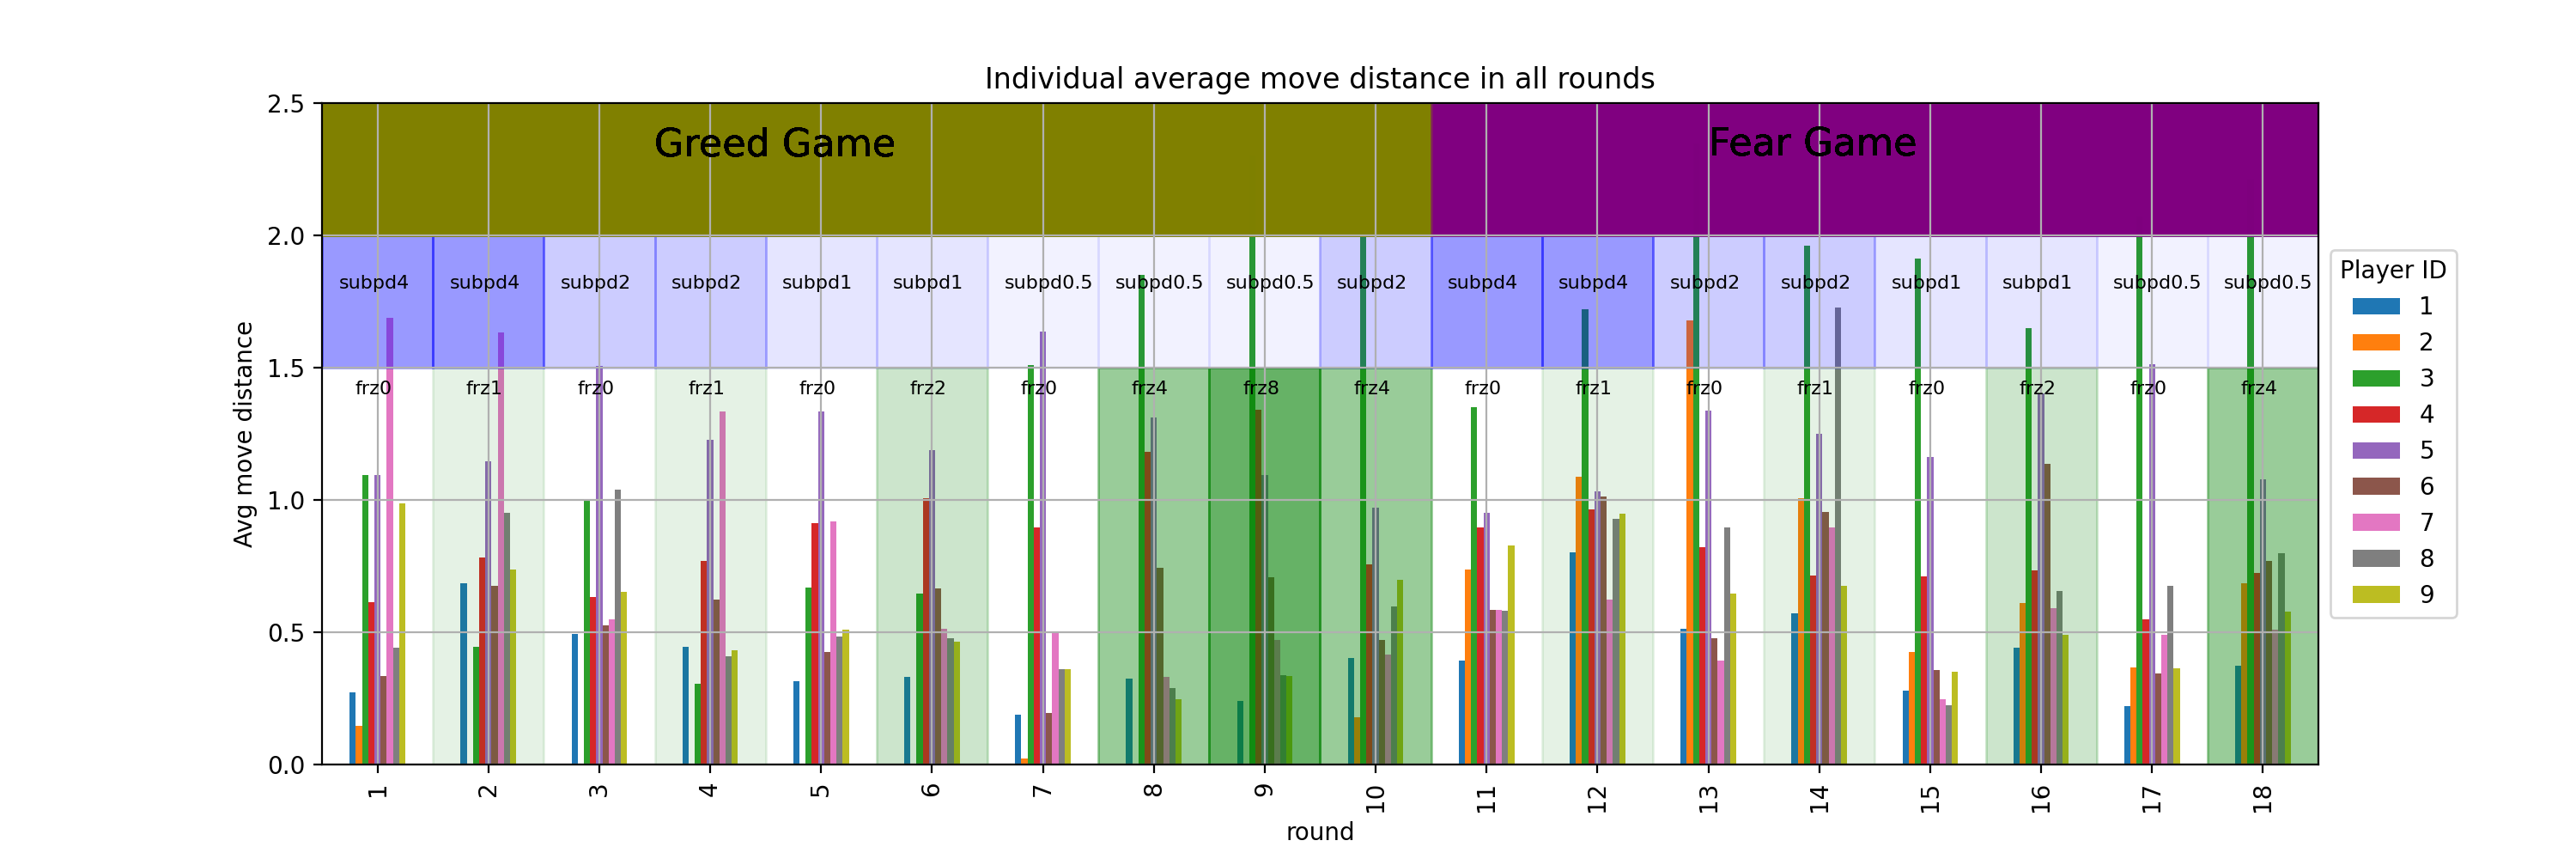

In [241]:
#absolute distance for each move
df = df_copy[df_copy['strategy'] < 100]
# df = df.drop(df[(df['round_number'] < 11) & (df['id_in_group'] == 2)].index)
df = df.loc[(df['move'] == 1)]
df = df.sort_values(by=['round_number','id_in_group', 'seconds'])
df['previous_strategies'] = df.groupby(['round_number','id_in_group'])['strategy'].shift()
df['absolute_distance'] = abs(df['previous_strategies'] - df['strategy'])
df_avg_dist = df.groupby(['round_number','id_in_group'])['absolute_distance'].mean()
df_avg_dist = df_avg_dist.reset_index()
df_avg_dist = df_avg_dist.pivot(index='round_number', columns='id_in_group', values='absolute_distance')
%matplotlib notebook
df_avg_dist.plot.bar(figsize=(15, 5))
for i in range(18):
    plt.text(i-0.2, 1.4, 'frz'+str(freeze_period_list[i]), fontsize = 8)
    plt.text(i-0.35, 1.8, 'subpd'+str(subperiod_list[i]), fontsize = 8)
    plt.axvspan(xmin=i-0.5, xmax=i+0.5, alpha=color_list[i]/10, color='g', ymin=0, ymax=3/5)
    plt.axvspan(xmin=i-0.5, xmax=i+0.5, alpha=subperiod_list[i]/10, color='b', ymin=3/5, ymax=4/5)
    plt.text(2.5, 2.3, 'Greed Game', fontsize = 16)
    plt.text(12, 2.3, 'Fear Game', fontsize = 16)
    plt.axvspan(xmin=-0.5, xmax=9.5, alpha=0.4, color='olive', ymin=4/5, ymax=1)
    plt.axvspan(xmin=9.5, xmax=17.5, alpha=0.4, color='purple', ymin=4/5, ymax=1)
plt.ylim([0,2.5])
plt.xlabel('round')
plt.ylabel('Avg move distance')
plt.title('Individual average move distance in all rounds')
plt.grid()
plt.legend(title='Player ID', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.savefig('avg_dist_all.png', bbox_inches='tight')
# plt.savefig('./Experiment_data/pilot_10102023/avg_move_dist', bbox_inches='tight')

In [62]:
seconds = []
diff = []
for i in range(7,10):
    temp_df = df.loc[(df['id_in_group'] == 6)&(df['round_number'] == i)] 
    sec = temp_df['seconds'].to_numpy().tolist()
    dif = temp_df['absolute_distance'].to_numpy().tolist()
    seconds.append(sec)
    diff.append(dif)
%matplotlib notebook
plt.plot(seconds[0],diff[0])
plt.plot(seconds[1],diff[1])
plt.plot(seconds[2],diff[2])
plt.xlabel('time')
plt.ylabel('payoff')
plt.title('Round 3: Group avg payoff over time vs. NE')
plt.grid()
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


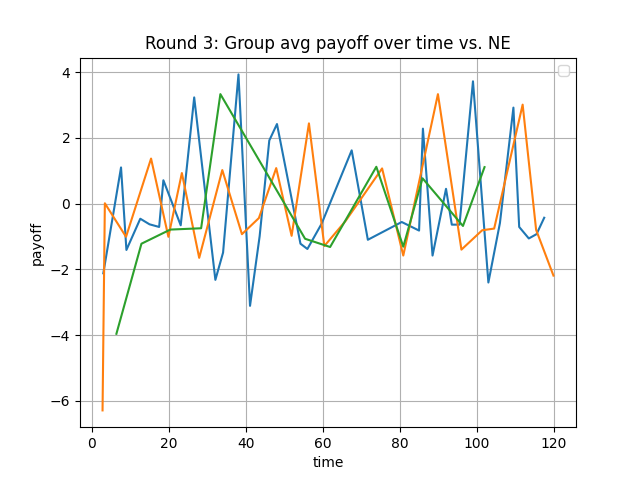

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


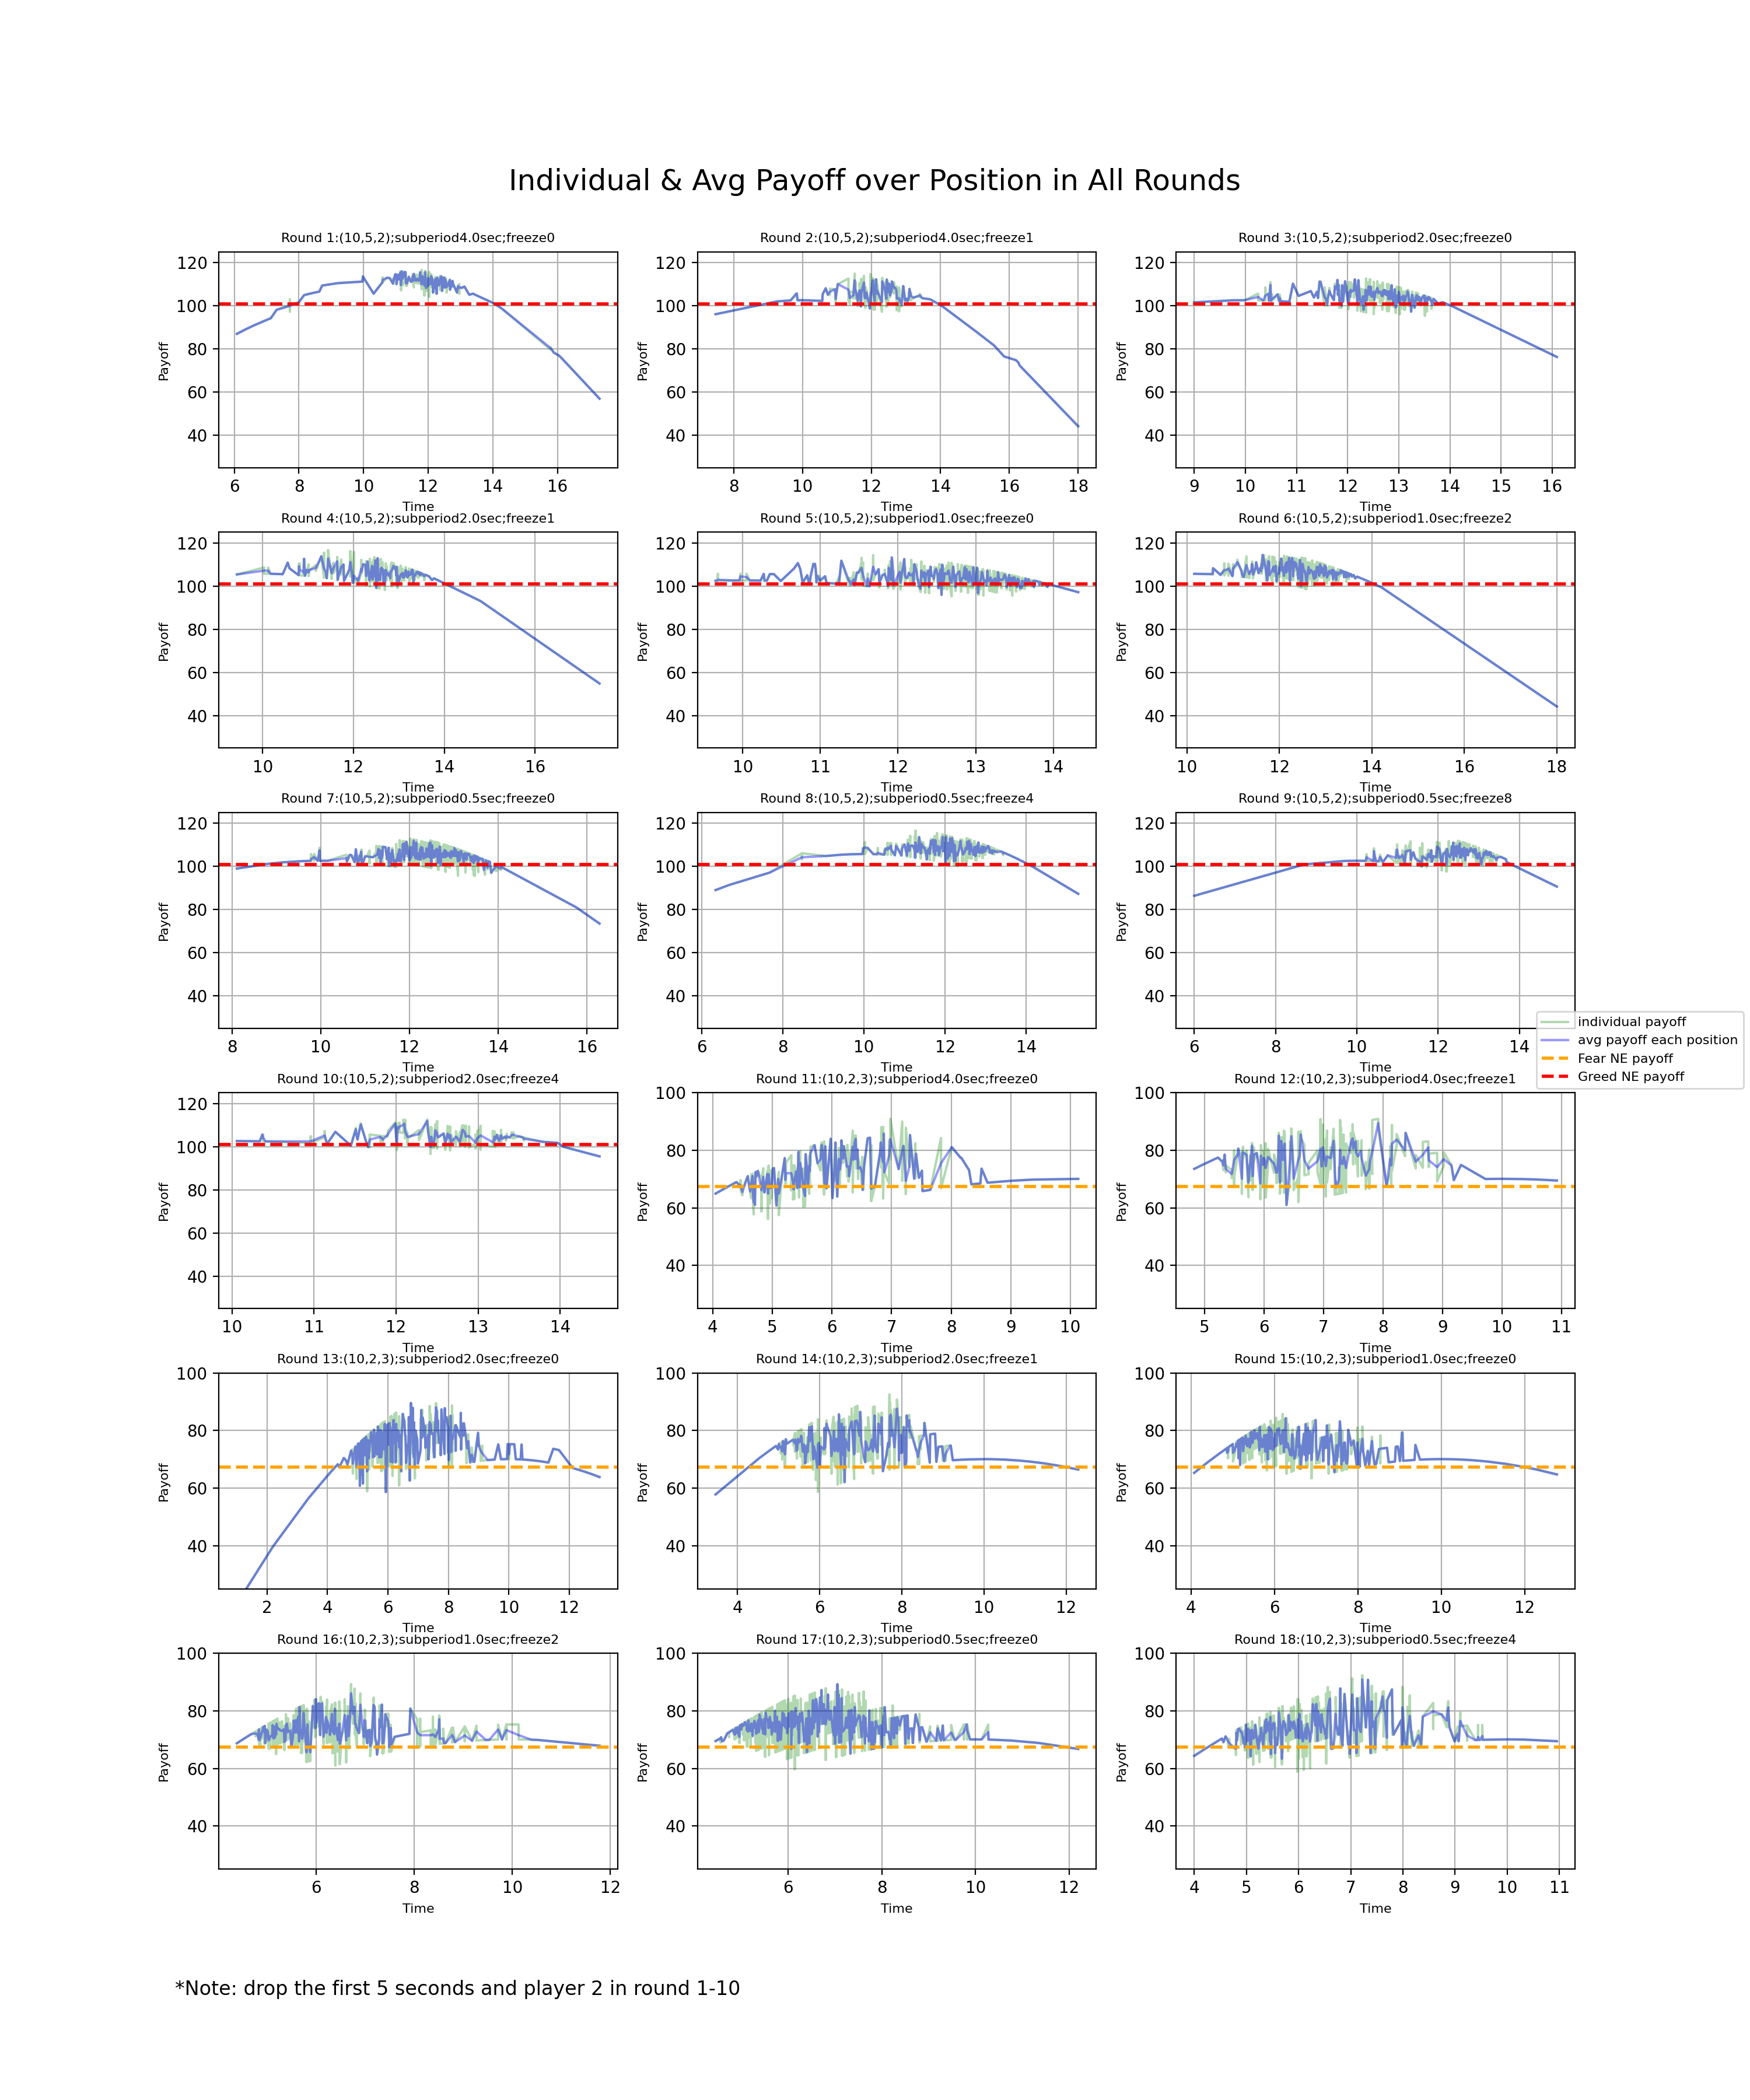

[<matplotlib.lines.Line2D object at 0x283b62790>, <matplotlib.lines.Line2D object at 0x283b62d60>, <matplotlib.lines.Line2D object at 0x280f0b220>, <matplotlib.lines.Line2D object at 0x28471b3d0>] ['individual payoff', 'avg payoff each position', 'Fear NE payoff', 'Greed NE payoff']


In [252]:
#generate payoffs over time in all rounds
df = df_copy[df_copy['strategy'] < 100]
df = df.drop(df[(df['round_number'] < 11) & (df['id_in_group'] == 2)].index)
df = df.loc[df['seconds']>5]
handles2 = []
labels2 = []
# df = df[(df['id_in_group']==1)|(df['id_in_group']>3)]
freeze_period_list = [0,1,0,1,0,2,0,4,8,4,0,1,0,1,0,2,0,4]
ylim = [[25,125], [25,100]]
# yticks = [[5,19], [0,14]]
NE_payoff = [101, 67.33]
# player_label = list(range(1,10))
rows = 6
cols = 3
fig = plt.figure(figsize=(5*cols,3*rows)) #single 5*3
fig.subplots_adjust(hspace=0.3, wspace=0.2)
for i in range(1, rows*cols+1):
    df_round = df[df['round_number']==i]
#     player_label = df_round.id_in_group.unique()
#     player_label.sort()
    subperiod = df_round.iloc[0]['subperiod']
    lam = int(df_round.iloc[0]['lambda'])
    gam = int(df_round.iloc[0]['gamma'])
    rho = int(df_round.iloc[0]['rho'])
    freeze = freeze_period_list[i-1]
    df_round = df_round.sort_values(by=['strategy'])
    df_avg_payoff_position = df_round.groupby('strategy')['payoff'].mean()
    df_avg_payoff_position=df_avg_payoff_position.reset_index()
#     player_label = df_round.columns
    title = 'Round ' +str(i) + ':'+'('+str(lam) +','+str(gam) +','+str(rho) +');'+ 'subperiod' + str(subperiod) + 'sec;freeze'+str(freeze)
    ax = fig.add_subplot(rows, cols, i)
    ax.plot(df_round['strategy'],df_round['payoff'], alpha=0.3, c='g', label='individual payoff')
    ax.plot(df_avg_payoff_position['strategy'], df_avg_payoff_position['payoff'], c='b', alpha=0.4, label='avg payoff each position')
    ax.set_title(title, fontsize=8)
    ax.set_xlabel('Time', fontsize=8)
    ax.set_ylabel('Payoff', fontsize=8)
    if gam == 5:
        ax.set_ylim(ylim[0])
#         ax.set_yticks(yticks[0])
        ax.axhline(y=NE_payoff[0], color='red', linestyle='--',linewidth=2, label='Greed NE payoff')
        handles1, labels1 = ax.get_legend_handles_labels()
    else:
        ax.set_ylim(ylim[1])
#         ax.set_yticks(yticks[1])
        ax.axhline(y=NE_payoff[1], color='orange', linestyle='--',linewidth=2, label='Fear NE payoff')
        handles2, labels2 = ax.get_legend_handles_labels()
    ax.grid()
handles2.append(handles1[-1])
labels2.append(labels1[-1])
print(handles2, labels2)
fig.legend(handles2, labels2, loc='center right', fontsize=8)
fig.suptitle('Individual & Avg Payoff over Position in All Rounds', y=0.92, fontsize=18)
plt.figtext(0.1,0.05,'*Note: drop the first 5 seconds and player 2 in round 1-10', fontsize=12)
plt.show()
plt.savefig('payoff_over_position_all.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


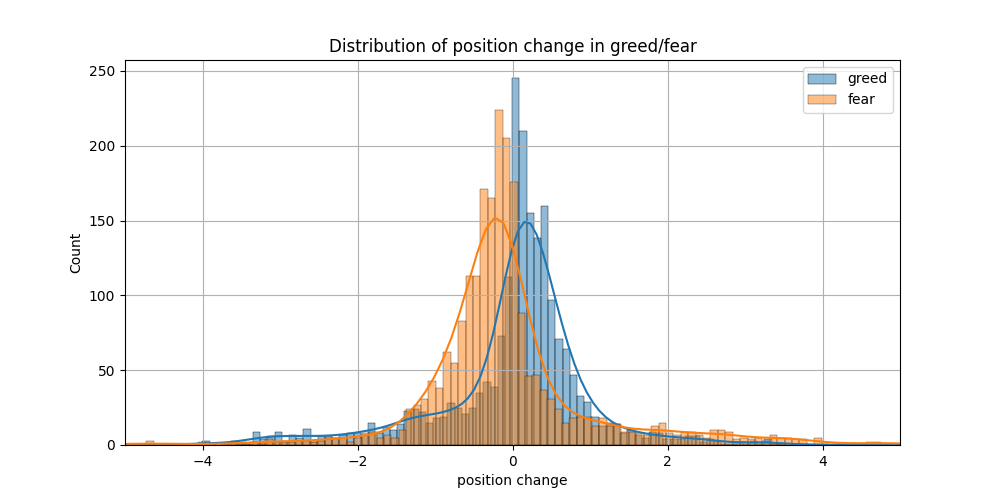

In [67]:
#sign position change distribution
df = df_copy[df_copy['strategy'] < 100]
# df = df.drop(df[(df['round_number'] < 11) & (df['id_in_group'] == 2)].index)
df = df.loc[(df['move'] == 1)]
df = df.drop(df[(df['move'] == 1) & (df['if_freeze_now'] == 1)].index)
df = df.sort_values(by=['round_number','id_in_group', 'seconds'])
df['previous_strategies'] = df.groupby(['round_number','id_in_group'])['strategy'].shift()
df['signed_distance'] = df['strategy'] - df['previous_strategies']
df_greed = df[df['round_number']<11]
df_fear = df[df['round_number']>10]

greed_mu = df_greed['signed_distance'].mean()
# greed_sigma = df_greed['signed_distance'].std()
fear_mu = df_fear['signed_distance'].mean()
# fear_sigma = df_fear['signed_distance'].std()
num_bins = 100
# print(greed_mu,greed_sigma,fear_mu, fear_sigma)
%matplotlib notebook
plt.figure(figsize=(10,5))
# sns.distplot(df_greed['signed_distance'], hist=True, kde=True, 
#              bins=num_bins, color = 'darkblue', alpha=0.3, label='greed')
# sns.distplot(df_fear['signed_distance'], hist=True, kde=True, 
#              bins=num_bins, color = 'olive', alpha=0.3, label='fear')

sns.histplot(data=df_greed['signed_distance'], kde=True, label='greed')
sns.histplot(data=df_fear['signed_distance'], kde=True, label='fear')

# greed_n, greed_bins, greed_patches = plt.hist(df_greed['signed_distance'],num_bins, alpha = 0.2,density=True, label='greed')
# fear_n, fear_bins, fear_patches = plt.hist(df_fear['signed_distance'],num_bins, alpha = 0.2,density=True, label='fear')

# y_greed = ((1 / (np.sqrt(2 * np.pi) * greed_sigma)) * np.exp(-0.5 * (1 / greed_sigma * (greed_bins - greed_mu))**2))
# y_fear = ((1 / (np.sqrt(2 * np.pi) * fear_sigma)) * np.exp(-0.5 * (1 / fear_sigma * (fear_bins - fear_mu))**2))
# # plt.hist(df_greed['signed_distance'],1000, alpha = 0.2, label='greed')
# # plt.hist(df_fear['signed_distance'],1000, alpha = 0.2, label='fear')
# plt.plot(greed_bins, y_greed, '--', color ='black')
# plt.plot(fear_bins, y_fear, '--', color ='red')
# # plt.axvline(x=0, color='red', linestyle='-',linewidth=2)
# plt.axvline(x=greed_mu, color='black', linestyle='-')
# plt.axvline(x=fear_mu, color='red', linestyle='-')
plt.xlabel('position change')
plt.xlim([-5,5])
plt.grid()
plt.legend()
plt.title('Distribution of position change in greed/fear')
plt.show()
plt.savefig('signed_position_change.png', bbox_inches='tight')


In [12]:
df = df_copy[df_copy['strategy'] < 100]
df = df.loc[(df['move'] == 1)]
df = df.sort_values(by=['round_number','id_in_group', 'seconds'])
df[df['round_number']==2]

session  subperiod  period_length  xmax  xmin   ymax  ymin  lambda  \
288  o98laudl        4.0            120  18.0   6.0  150.0   0.0    10.0   
297  o98laudl        4.0            120  18.0   6.0  150.0   0.0    10.0   
315  o98laudl        4.0            120  18.0   6.0  150.0   0.0    10.0   
333  o98laudl        4.0            120  18.0   6.0  150.0   0.0    10.0   
342  o98laudl        4.0            120  18.0   6.0  150.0   0.0    10.0   
..        ...        ...            ...   ...   ...    ...   ...     ...   
485  o98laudl        4.0            120  18.0   6.0  150.0   0.0    10.0   
503  o98laudl        4.0            120  18.0   6.0  150.0   0.0    10.0   
521  o98laudl        4.0            120  18.0   6.0  150.0   0.0    10.0   
530  o98laudl        4.0            120  18.0   6.0  150.0   0.0    10.0   
548  o98laudl        4.0            120  18.0   6.0  150.0   0.0    10.0   

     gamma  rho  ...  participant round_number  id_in_group  seconds  \
288    5.0  2.0  ...     14m83rrc            2            1      4.4   
297    5.0  2.0  ...     14m83rrc            2            1      8.3   
315    5.0  2.0  ...     14m83rrc            2            1     16.3   
333    5.0  2.0  ...     14m83rrc            2            1     24.2   
342    5.0  2.0  ...     14m83rrc            2            1     28.3   
..     ...  ...  ...          ...          ...          ...      ...   
485    5.0  2.0  ...     iitwb8xg            2            9     88.3   
503    5.0  2.0  ...     iitwb8xg            2            9     96.3   
521    5.0  2.0  ...     iitwb8xg            2            9    104.3   
530    5.0  2.0  ...     iitwb8xg            2            9    108.3   
548    5.0  2.0  ...     iitwb8xg            2            9    116.3   

     strategy      payoff  multiplied_payoff  move  remaining_freeze_period  \
288      9.31  102.168272         102.168272     1                        1   
297      9.26  102.095603         102.095603     1                        1   
315     11.68  110.449800         110.449800     1                        1   
333     11.80  102.376444         102.376444     1                        1   
342     11.82   99.285576          99.285576     1                        1   
..        ...         ...                ...   ...                      ...   
485     13.89  101.371826         101.371826     1                        1   
503     11.54  110.956950         110.956950     1                        1   
521     11.97  100.206528         100.206528     1                        1   
530     11.95   98.787459          98.787459     1                        1   
548     12.48  108.696471         108.696471     1                        1   

     if_freeze_now  
288              0  
297              1  
315              0  
333              0  
342              1  
..             ...  
485              0  
503              0  
521              0  
530              1  
548              0  

[110 rows x 21 columns]